# Advance in Data Science INFO7390 - Project

## Application of Deep Neural Networks in Diabetes Biomarkers prediction Development

## Abstract : 

Biomarkers are basically the indicators which helps in diagnosis of a health condition or disease. This plays an important role in diagnostic department of healthcare sector. Through this project, we are trying to implement deep learning technique in healthcare. 

This project aims using different machine learning and deep learning techniques to identify different diabetes biomarkers present in the blood sample of various patients. Developing a neural network model to predict whether person will have diabetes. 

## Purpose :

Purpose of the project is to use different machine learning techniques and also deep learning techniques to predict the output and compare the performance of deep neural networks over traditional machine learning models.

## Techniques Used: 

We will be using different machine learning as well as deep learning techniques to understand and predict the given outcome.

### Machine Learning techniques Used:
Decision Tree, Random Forests, KNN etc. 

### Deep Learning Techniques Used: 

Artificial Neural Network with different number of layers, neurons and activation functions. 

### Evaluation Metrics Used:

We will be employing Accuracy, AUC-ROC curve, binary cross entropy. We will be plotting the graphs to check training and validation accuracy as well as training and validation loss.

## About Dataset

Dataset has been taken from Kaggle. 
This dataset comprises of blood sample of different patients used to depict whether person will have diabetes or not.

Sample Size : 768

No of features: 9

Type of problem: Binary classification. 

### Exploring the dataset 

We will be reading the dataset and importing into a dataframe and understand different statistical aspects of the dataset. We will check if null values are present in the dataset.

In [109]:
#importing sklearn and traditional Python machine learning libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# importing keras, tensorflow and related modules
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential # intitialize the ANN
from keras.layers import Dense, Dropout      # create layers
from keras.optimizers import Adam, SGD, RMSprop

In [4]:
# importing the dataset and initializing a dataframe.
diabetes_df=pd.read_csv("diabetes.csv", decimal = ',')


### Exploratory Data Analysis and Data Cleaning

Here, we will be exploring the data and check for null values, improper formats and other data related issues. We will resolve these issues and clean the data which can be furthur used for building the model. 

In [5]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
diabetes_df.shape

(768, 9)

In [7]:
diabetes_df.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

    DiabetesPedigreeFunction  Age  Outcome  
0                      0.627   50 

### Data Pre-processing and Exploratory Data Analysis

Before any model building, it is essential to understand the data properly, understand the importance of various features of the dataset. It is essential to clean the dataset and prepare it for model building so that predicting outcome is easier and more efficient. 

One part of data pre-processing is checking for the missing values in the dataset. Below line of code executed shows number of missing values in the dataset. 

In [89]:
# checking whether there are any missing values in the dataset.
diabetes_df.isnull().values.any()

False

In [518]:
diabetes_df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


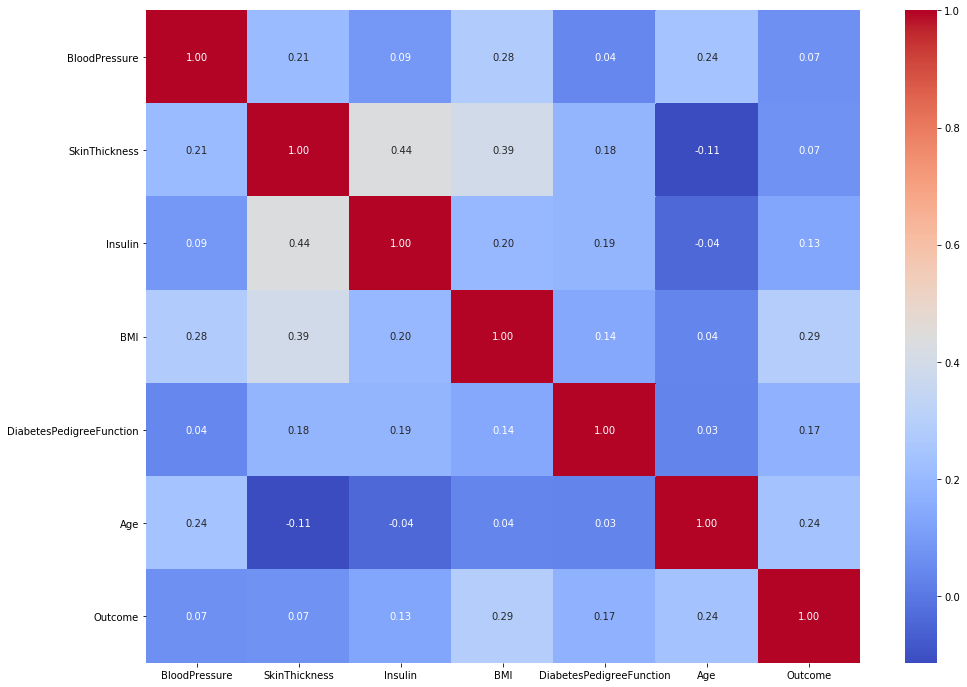

In [520]:
plt.figure(figsize=(16,12))
sns.heatmap(data=diabetes_df.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

#### Feature Scaling and why is it important?

It is a part of data pre-processing which is applied to independent variables or features of the data. 

It is important to normalize the data within a particular range and sometimes it helps in speeding up the calculations in an algorithm. 

Below line of code shows scaling of features in the dataset. 

In [90]:
# scale all the columns except the 'outcome'
    scaler = StandardScaler()
    diabetes_df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']] = \
    scaler.fit_transform(diabetes_df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']])

In [91]:
# defining variables X and Y. Y variable has the target value and X variable has other features in the dataset. 
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["Outcome"].values

In [92]:
# splitting the data into train and test data in the ratio 70% and 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
#return X_train, X_test, y_train, y_test

(537, 8) (537,) (231, 8) (231,)


In [12]:
# defining all functions used in the project

#this function is used to plot auc-roc curve
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes dataset'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])

#function used to fit the training data into the model  
def train_clf(clf, X_train, y_train):
    
    return clf.fit(X_train, y_train)
    
#function used to predict the outcome and return f1 score   
def pred_clf(clf, features, target):
    
   y_pred = clf.predict(features)
   return f1_score(target.values, y_pred, pos_label = 1)


def train_predict(clf, X_train, y_train, X_test, y_test):
    
    train_clf(clf, X_train, y_train)
    
    print("F1 score for training set is: {:.4f}".format(pred_clf(clf, X_train, y_train)))
    print("F1 score for testing set is: {:.4f}\n".format(pred_clf(clf, X_test, y_test)))
    


### Applying Machine Learning Techniques

We will use Random Forests, K-Nearest Neighbors, Decision Trees to predict the outcome. We will also check for accuracy, AUC-ROC score values. 

### Random Forest Classifier

Random Forests are also known as random decision forests is a popular ensemble method useful for predicting the outcome. 

Random forest classifier creates a set of decision trees from randomly selected subset of training set. It then aggregates the votes from different decision trees to decide the final class of the test object.

Hyperparameters for Random Forests Classifier: Total Number of trees to be generated and decision tree related parameters like minimum split, split criteria etc.

In [93]:
## Train the RF Model
rf_model = RandomForestClassifier(n_estimators=300)
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [97]:
# Make predictions on the test set - both "hard" predictions, and the scores (percent of trees voting yes)
y_pred_class_rf = rf_model.predict(X_test)
y_pred_prob_rf = rf_model.predict_proba(X_test)

print('Accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_rf)))
print('ROC-AUC is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_rf[:,1])))


Accuracy is 0.723
ROC-AUC is 0.812


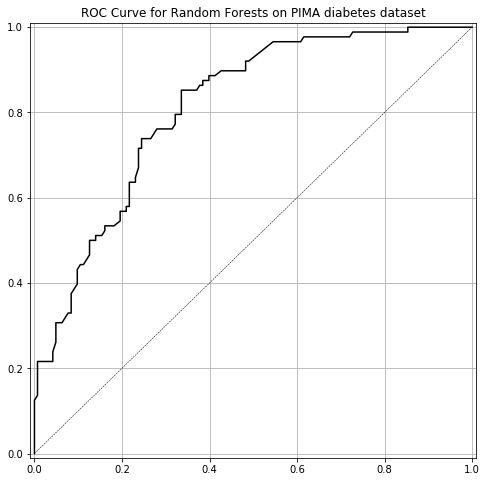

In [95]:

plot_roc(y_test, y_pred_prob_rf[:, 1], 'Random Forests')

#### Accuracy obtained is 72.3 % and AUC-ROC value is 0.81 by employing Random Forest Model. 

### Using K-Nearest neighbors method

K-Nearest neighbor classifier is a popular algorithm useful for classification problems.

K-nearest neighbor algorithm predicts the class of the data point as per the majority of the votes obtained from the neighboring points and calculates distance such as Euclidean distance, hamming distance, cosine distance etc. Based on the votes, label is assigned to the new data point which needs to be predicted.  

In [110]:
ds_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']

In [111]:
X = diabetes_df.iloc[:, 0:8]
y = diabetes_df.iloc[:, 8]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11111, test_size=0.3)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(537, 8) (537,) (231, 8) (231,)


In [112]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [113]:
# Define the model: Init K-NN
classifier = KNeighborsClassifier(n_neighbors=7, p=2, metric='euclidean')

In [114]:
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [115]:
y_pred = classifier.predict(X_test)

In [116]:
# Evaluate Model
from sklearn.metrics import f1_score
evaluate_cm = confusion_matrix(y_test, y_pred)
print (evaluate_cm)
print(f1_score(y_test, y_pred))

[[127  23]
 [ 34  47]]
0.6225165562913907


In [117]:
# creating the confusion matrix
evaluate_cm = confusion_matrix(y_test, y_pred)
print (evaluate_cm)
print('F1 score is ' ,f1_score(y_test, y_pred))
print('Accuracy is' , accuracy_score(y_test, y_pred))

[[127  23]
 [ 34  47]]
F1 score is  0.6225165562913907
Accuracy is 0.7532467532467533


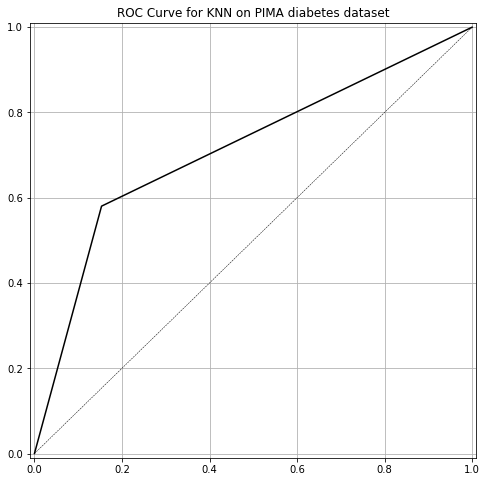

In [118]:
plot_roc(y_test, y_pred, 'KNN')

#### Accuracy score obtained from KNN method = 75.3%

###  Gradient Boosting Classifier

Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. 

It builds the model in a stage-wise fashion like other boosting methods do, and it generalizes them by allowing optimization of an arbitrary differentiable loss function.

In [107]:
params = {'max_depth':9, 'subsample':0.5, 'learning_rate':0.01, 'min_samples_leaf':1, 'random_state':42}
gbc = GradientBoostingClassifier(n_estimators=290, **params)
clf_ = gbc.fit(X_train, y_train)
y_pred = clf_.predict(X_test)
print('Accuracy is {}'.format(accuracy_score(y_test,y_pred )))
train_predict(gbc, X_train, y_train, X_test, y_test)

Accuracy is 0.7835497835497836
F1 score for training set is: 1.0000
F1 score for testing set is: 0.6753



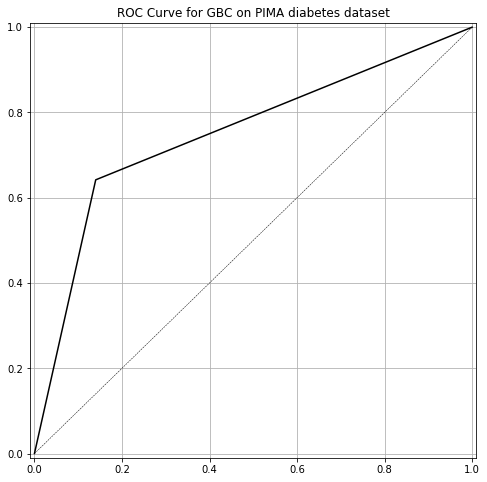

In [108]:
plot_roc(y_test, y_pred, 'GBC')

#### Accuracy obtained by applying Gradient Boosting Classifier is 78.3%

Using all 3 techniques , we see that best accuracy obtained from Gradient Boosting Classifier which is 78.3%

Now, we need to develop a neural network model to see how well it performs and if they can achieve a better accuracy from these models. Wide and deep neural networks usually performs better but we need to experiment and see which model performs better. 

## Developing Deep Learning Neural Network Model 

Artificial Neural Network is a computational model based on the biological neural network which consists of various neurons and attempts to simulate the network of neurons so that it can learn the pattern programmatically and make better decisions.

ANN comprises of input layer , output layer and hidden layers. Weights are assigned to them and using the backward propagation mechanism, weights are updated accordingly. 

### Important Terminologies and Concepts to understand Neural Network Model 

#### Activation Functions:
Activation functions play an important role in neural network model because they introduce non-linearity. The main purpose is to convert a input signal of a node in a ANN to an output signal. This output signal now used as an input in the next layer in the stack. 

In ANN, we compute the sum of products of inputs and their corresponding weights and then apply activation function f(x) to it to get the output layer and feed it as an input to the next layer. There are various kinds of activation function. Only discussing the most popular activation functions used in the project. 

#### Sigmoid activation function: 
It is an activation function of form f(x)=1/1+exp(-x) . Range is between 0 and 1. Useful for binary classification problems. 

#### Tanh activation function:
Its mathematical formula is f(x)=1-exp(-2x)/1+exp(-2x). Its output is zero centered because its range in between -1 and 1. Optimization is easier in this case and generally preferred over sigmoid function. 

#### RELU activation function:
It is also popularly called as linear rectified unit. It returns the value provided as input directly, or the value 0.0 if the input is less than zero. 

Function can be described as g(z) = max{0,z}


In [379]:
#normalizing values
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)
print('X_train_normalized is' , X_train_norm)
print('X test normalized is ',X_test_norm)

X_train_normalized is [[-0.21654016 -0.04466859  0.07176895 ...  1.43258932 -0.09568657
  -0.25299319]
 [-1.0996951  -0.61882624 -0.23329642 ...  1.13123171  0.03565317
  -1.0298141 ]
 [ 0.07784482  0.84846554 -0.43667334 ... -0.13971125 -0.99715482
  -0.33930663]
 ...
 [ 0.66661477 -3.87238629 -0.02991951 ...  0.92159163  0.72518683
   0.69645458]
 [-0.51092514  0.62518201 -0.5383618  ... -0.86034901  0.64160699
  -0.7708738 ]
 [-0.80531012  0.21051259  0.68189969 ... -0.58519641 -1.10162962
  -0.94350067]]
X test normalized is  [[-0.51092514  0.05102436 -1.04680408 ...  1.32776928  0.10729303
  -0.59824693]
 [ 0.66661477  0.40189848  0.58021123 ...  1.86497198 -0.73447533
   1.12802175]
 [ 0.07784482 -0.20415682  0.17345741 ... -0.40176135 -0.32254613
   1.12802175]
 ...
 [ 0.07784482 -1.22488154  0.88527661 ... -0.34935133 -0.49866079
   0.09226054]
 [-0.80531012  0.72087495  0.68189969 ...  1.22294924  0.36698753
  -0.42562006]
 [-0.21654016 -1.38436978  0.07176895 ...  0.06992882 

### Developing a neural network model with 1 hidden layer. 

Here, we have defined a model having 3 dense layers. 
First is the input layer wherein we have defined an input shape which is 8 and also defined activation function. I have used RELU activation function and as 12 neurons. 

Second layer consists of a hidden layer having 8 neurons and RELU activation function. 

Third layer is the output layer having just 1 neuron and used Sigmoid activation function as the output ranges between 0 and 1. Sigmoid functions are useful for binary classification problems. 

We have used Sequential class from Keras library wherein you can build a model, define the layers, input and output. 

There are 4 major steps involved in model building:
1. Define a model
2. Compile the model
3. Fit the data into the model
4. Predict the outcome

In [389]:
# definining a model with input, 1 hidden layer and output layer.
def nn_model_1(model):
    model.add(Dense(12, input_shape=(8,), activation="relu"))
    model.add(Dense(8, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    return model

In [390]:
# calling the above function and initializing the model.
model = Sequential()
model = nn_model_1(model)

In [391]:
#prints the model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_85 (Dense)             (None, 12)                108       
_________________________________________________________________
dense_86 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_87 (Dense)             (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


#### Understanding the model compile method:

#### Optimizers used:

There are different options of optimizers which can be used in the model such as Adam , SGD and RMSProp. Most popular is SGD which is nothing but Stochastic Gradient Descent.This is useful to minimize the loss function and computes the gradientat each iteration and then helps in updating the weights in the model using backward propagation algorithm. We have used SGD as an optimizer in the model in the whole project. There are others which can be used in the model as well such as Adam or RMSProp.

#### Binary Cross Entropy Losses :
It is also called as Sigmoid Cross entropy loss. It is basically a sigmoid function and cross-entropy loss. It is independent for each vector component class which is the loss computed for every output vector component not affected by other component values. Since this is a binary classification problem, we have used binary cross entropy loss. 

#### Learning Rates:
Learning Rate is a hyperparameter that controls how much we are adjusting the weights of our network with respect the loss gradient. Lower the learning rate, slower we travel along the downward slope. Equation of new weight calculation is given by:

new_weight = existing weight - learning rate * gradient

During the model building, we need to test and check the performance of the model. If the learning rate is too low then gradient will be very slow and if the learning rate is too high then the gradient descent can overshoot the minimum and they might fail to converge. 

Optimal value of the learning rate can be found only when the user tests and check or can have intuition based on the past experiences. In this project, I have tried testing with different learning rates to see the model performance. 

In [402]:
# through this code, we are compiling the above generated model. 
sgd = SGD(lr=0.05)
model.compile(loss="binary_crossentropy",optimizer=sgd, metrics=["accuracy"],sample_weight_mode=None)


#### Model fit method

In below line of code, we have tried fitting the data into the model and the output of the method is stored in a variable called run_hist_1. 

Verbose =1 signifies that it will show the animated training progress in the output when you run the code. 

Epochs : It is the hyperparameter set before training the model. One epoch is when an entire dataset is passed both backward and forward through the neural network. It defines the number of times the learning algorithm will work through the entire dataset. We have used different epochs in different models.

In [393]:
run_hist_1 = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), verbose=1, epochs=200)

Train on 537 samples, validate on 231 samples
Epoch 1/200
537/537 [==============================] - 2s 3ms/step - loss: 0.6674 - acc: 0.6480 - val_loss: 0.6699 - val_acc: 0.6494
Epoch 2/200
537/537 [==============================] - 0s 85us/step - loss: 0.6254 - acc: 0.6480 - val_loss: 0.6343 - val_acc: 0.6494
Epoch 3/200
537/537 [==============================] - 0s 184us/step - loss: 0.5958 - acc: 0.6611 - val_loss: 0.6058 - val_acc: 0.6797
Epoch 4/200
537/537 [==============================] - 0s 80us/step - loss: 0.5709 - acc: 0.6853 - val_loss: 0.5829 - val_acc: 0.6840
Epoch 5/200
537/537 [==============================] - 0s 217us/step - loss: 0.5500 - acc: 0.7132 - val_loss: 0.5646 - val_acc: 0.7056
Epoch 6/200
537/537 [==============================] - 0s 91us/step - loss: 0.5330 - acc: 0.7318 - val_loss: 0.5495 - val_acc: 0.7229
Epoch 7/200
537/537 [==============================] - 0s 106us/step - loss: 0.5191 - acc: 0.7486 - val_loss: 0.5367 - val_acc: 0.7489
Epoch 8/200
53

537/537 [==============================] - 0s 115us/step - loss: 0.4270 - acc: 0.7914 - val_loss: 0.5042 - val_acc: 0.7749
Epoch 62/200
537/537 [==============================] - 0s 85us/step - loss: 0.4272 - acc: 0.7970 - val_loss: 0.5041 - val_acc: 0.7749
Epoch 63/200
537/537 [==============================] - 0s 149us/step - loss: 0.4263 - acc: 0.7896 - val_loss: 0.5050 - val_acc: 0.7662
Epoch 64/200
537/537 [==============================] - 0s 169us/step - loss: 0.4255 - acc: 0.7970 - val_loss: 0.5064 - val_acc: 0.7619
Epoch 65/200
537/537 [==============================] - 0s 704us/step - loss: 0.4245 - acc: 0.7989 - val_loss: 0.5065 - val_acc: 0.7662
Epoch 66/200
537/537 [==============================] - 0s 327us/step - loss: 0.4254 - acc: 0.7933 - val_loss: 0.5053 - val_acc: 0.7662
Epoch 67/200
537/537 [==============================] - 0s 150us/step - loss: 0.4241 - acc: 0.7914 - val_loss: 0.5050 - val_acc: 0.7749
Epoch 68/200
537/537 [==============================] - 0s 199

Epoch 121/200
537/537 [==============================] - 0s 247us/step - loss: 0.4037 - acc: 0.8231 - val_loss: 0.5243 - val_acc: 0.7749
Epoch 122/200
537/537 [==============================] - 0s 135us/step - loss: 0.4042 - acc: 0.8250 - val_loss: 0.5253 - val_acc: 0.7792
Epoch 123/200
537/537 [==============================] - 0s 150us/step - loss: 0.4029 - acc: 0.8231 - val_loss: 0.5228 - val_acc: 0.7749
Epoch 124/200
537/537 [==============================] - 0s 147us/step - loss: 0.4030 - acc: 0.8212 - val_loss: 0.5251 - val_acc: 0.7706
Epoch 125/200
537/537 [==============================] - 0s 184us/step - loss: 0.4028 - acc: 0.8250 - val_loss: 0.5277 - val_acc: 0.7749
Epoch 126/200
537/537 [==============================] - 0s 109us/step - loss: 0.4021 - acc: 0.8231 - val_loss: 0.5298 - val_acc: 0.7792
Epoch 127/200
537/537 [==============================] - 0s 184us/step - loss: 0.4007 - acc: 0.8212 - val_loss: 0.5221 - val_acc: 0.7749
Epoch 128/200
537/537 [==================

537/537 [==============================] - 0s 171us/step - loss: 0.3820 - acc: 0.8268 - val_loss: 0.5481 - val_acc: 0.7749
Epoch 181/200
537/537 [==============================] - 0s 267us/step - loss: 0.3815 - acc: 0.8305 - val_loss: 0.5538 - val_acc: 0.7706
Epoch 182/200
537/537 [==============================] - 0s 227us/step - loss: 0.3805 - acc: 0.8361 - val_loss: 0.5507 - val_acc: 0.7706
Epoch 183/200
537/537 [==============================] - 0s 160us/step - loss: 0.3814 - acc: 0.8287 - val_loss: 0.5613 - val_acc: 0.7792
Epoch 184/200
537/537 [==============================] - 0s 188us/step - loss: 0.3821 - acc: 0.8287 - val_loss: 0.5515 - val_acc: 0.7662
Epoch 185/200
537/537 [==============================] - 0s 264us/step - loss: 0.3797 - acc: 0.8343 - val_loss: 0.5523 - val_acc: 0.7749
Epoch 186/200
537/537 [==============================] - 0s 199us/step - loss: 0.3791 - acc: 0.8343 - val_loss: 0.5520 - val_acc: 0.7749
Epoch 187/200
537/537 [==============================] 

In [394]:
y_pred_class_nn_1 = model.predict_classes(X_test_norm)
y_pred_prob_nn_1 = model.predict(X_test_norm)

In [395]:
# Let's check out the outputs to get a feel for how keras apis work.
y_pred_class_nn_1[:10]

array([[1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0]])

In [396]:
y_pred_prob_nn_1[:10]

array([[0.70708334],
       [0.89493465],
       [0.518112  ],
       [0.0581139 ],
       [0.23702025],
       [0.57479405],
       [0.00375727],
       [0.48315445],
       [0.9495256 ],
       [0.17577732]], dtype=float32)

Accuracy is 0.775
ROC-AUC is 0.814


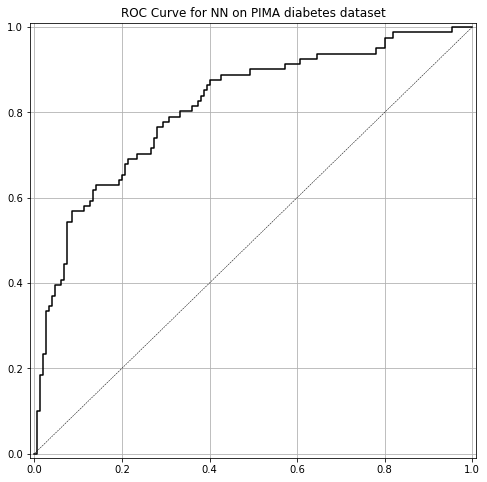

In [397]:
# Print model performance and plot the roc curve
print('Accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('ROC-AUC is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

#### Accuracy obtained from this model is slightly better 77.5% and ROC-AUC value is 0.814 

If we tune the hyperpaprameters and add more layers, epochs, learing rate then model might improve. 

Lets try running for more number of epoch iterations.

In [398]:
run_hist_1.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

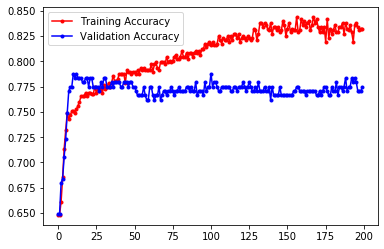

In [399]:
#plotting the curve to check training and validation accuracy
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["acc"],'r', marker='.', label="Training Accuracy")
ax.plot(run_hist_1.history["val_acc"],'b', marker='.', label="Validation Accuracy")
ax.legend()

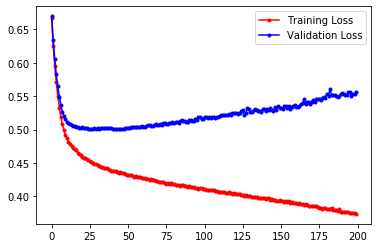

In [400]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Training Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

In [401]:
print('Training loss=',run_hist_1.history["loss"])

print('Validation Loss=',run_hist_1.history["val_loss"])

Training loss= [0.667396244057064, 0.6254130719538286, 0.5957936708931595, 0.5708816987176181, 0.5500221115916801, 0.532988995147151, 0.519072246063133, 0.5081218436665597, 0.49905164942173097, 0.4921787594283759, 0.4867541404853764, 0.4819810397687127, 0.47898368706694305, 0.47529946941903184, 0.4727154449599637, 0.47074349699073664, 0.4687215073148632, 0.4656917346256405, 0.46298287584128994, 0.46203451571739806, 0.45959297161084534, 0.457968141002584, 0.4575342527092946, 0.45555174606028437, 0.45450002093776865, 0.452689578524293, 0.451127015456585, 0.45030251239709124, 0.4490982667027905, 0.4485761690295164, 0.44645637062896787, 0.4454214628404301, 0.44473576806555026, 0.4437639905864744, 0.4431102724825648, 0.44185843159144594, 0.4422457546717184, 0.4406720336589067, 0.4398247683958412, 0.43871851995226613, 0.43841959189214297, 0.43744796692104093, 0.43780545049539493, 0.4369372257640242, 0.4355056181522277, 0.4357536056632214, 0.4345020569680567, 0.4350529530638867, 0.43316176178

#### Increasing the epochs to 400 and checking the performance of the model. 

Lets increase the number of epochs to 400 and check the performance of the model. Rest all the parameter values will remain unchanged. Here we are trying to check if the number of epochs makes a difference in performance to the model. 

In [147]:
run_hist_400 = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=400)

Train on 537 samples, validate on 231 samples
Epoch 1/400
537/537 [==============================] - 0s 139us/step - loss: 0.3426 - acc: 0.8436 - val_loss: 0.6438 - val_acc: 0.7186
Epoch 2/400
537/537 [==============================] - 0s 54us/step - loss: 0.3408 - acc: 0.8510 - val_loss: 0.6470 - val_acc: 0.7359
Epoch 3/400
537/537 [==============================] - 0s 59us/step - loss: 0.3426 - acc: 0.8547 - val_loss: 0.6484 - val_acc: 0.7186
Epoch 4/400
537/537 [==============================] - 0s 61us/step - loss: 0.3430 - acc: 0.8454 - val_loss: 0.6456 - val_acc: 0.7273
Epoch 5/400
537/537 [==============================] - 0s 65us/step - loss: 0.3392 - acc: 0.8417 - val_loss: 0.6505 - val_acc: 0.7316
Epoch 6/400
537/537 [==============================] - 0s 65us/step - loss: 0.3422 - acc: 0.8492 - val_loss: 0.6466 - val_acc: 0.7186
Epoch 7/400
537/537 [==============================] - 0s 58us/step - loss: 0.3398 - acc: 0.8492 - val_loss: 0.6460 - val_acc: 0.7446
Epoch 8/400
537

537/537 [==============================] - 0s 156us/step - loss: 0.3178 - acc: 0.8696 - val_loss: 0.6903 - val_acc: 0.7273
Epoch 62/400
537/537 [==============================] - 0s 156us/step - loss: 0.3195 - acc: 0.8622 - val_loss: 0.6855 - val_acc: 0.7273
Epoch 63/400
537/537 [==============================] - 0s 630us/step - loss: 0.3196 - acc: 0.8566 - val_loss: 0.6910 - val_acc: 0.7316
Epoch 64/400
537/537 [==============================] - 0s 203us/step - loss: 0.3177 - acc: 0.8715 - val_loss: 0.6879 - val_acc: 0.7359
Epoch 65/400
537/537 [==============================] - 0s 84us/step - loss: 0.3198 - acc: 0.8603 - val_loss: 0.6901 - val_acc: 0.7229
Epoch 66/400
537/537 [==============================] - 0s 130us/step - loss: 0.3176 - acc: 0.8659 - val_loss: 0.6977 - val_acc: 0.7186
Epoch 67/400
537/537 [==============================] - 0s 85us/step - loss: 0.3174 - acc: 0.8734 - val_loss: 0.6982 - val_acc: 0.7143
Epoch 68/400
537/537 [==============================] - 0s 546u

537/537 [==============================] - 0s 210us/step - loss: 0.2985 - acc: 0.8734 - val_loss: 0.7205 - val_acc: 0.7316
Epoch 122/400
537/537 [==============================] - 0s 132us/step - loss: 0.3053 - acc: 0.8752 - val_loss: 0.7259 - val_acc: 0.7143
Epoch 123/400
537/537 [==============================] - 0s 199us/step - loss: 0.3031 - acc: 0.8678 - val_loss: 0.7297 - val_acc: 0.7446
Epoch 124/400
537/537 [==============================] - 0s 253us/step - loss: 0.3012 - acc: 0.8696 - val_loss: 0.7155 - val_acc: 0.7316
Epoch 125/400
537/537 [==============================] - 0s 100us/step - loss: 0.3004 - acc: 0.8696 - val_loss: 0.7200 - val_acc: 0.7359
Epoch 126/400
537/537 [==============================] - 0s 178us/step - loss: 0.3037 - acc: 0.8622 - val_loss: 0.7185 - val_acc: 0.7359
Epoch 127/400
537/537 [==============================] - 0s 117us/step - loss: 0.3003 - acc: 0.8752 - val_loss: 0.7321 - val_acc: 0.7489
Epoch 128/400
537/537 [==============================] 

537/537 [==============================] - 0s 193us/step - loss: 0.2934 - acc: 0.8696 - val_loss: 0.7407 - val_acc: 0.7143
Epoch 181/400
537/537 [==============================] - 0s 78us/step - loss: 0.2904 - acc: 0.8659 - val_loss: 0.7473 - val_acc: 0.7359
Epoch 182/400
537/537 [==============================] - 0s 85us/step - loss: 0.2917 - acc: 0.8752 - val_loss: 0.7465 - val_acc: 0.7186
Epoch 183/400
537/537 [==============================] - 0s 109us/step - loss: 0.2981 - acc: 0.8659 - val_loss: 0.7425 - val_acc: 0.7186
Epoch 184/400
537/537 [==============================] - 0s 132us/step - loss: 0.2929 - acc: 0.8734 - val_loss: 0.7496 - val_acc: 0.7229
Epoch 185/400
537/537 [==============================] - 0s 238us/step - loss: 0.2936 - acc: 0.8659 - val_loss: 0.7501 - val_acc: 0.7273
Epoch 186/400
537/537 [==============================] - 0s 251us/step - loss: 0.2915 - acc: 0.8752 - val_loss: 0.7422 - val_acc: 0.7186
Epoch 187/400
537/537 [==============================] - 

Epoch 240/400
537/537 [==============================] - 0s 173us/step - loss: 0.2831 - acc: 0.8808 - val_loss: 0.7710 - val_acc: 0.7143
Epoch 241/400
537/537 [==============================] - 0s 100us/step - loss: 0.2974 - acc: 0.8678 - val_loss: 0.7637 - val_acc: 0.7359
Epoch 242/400
537/537 [==============================] - 0s 247us/step - loss: 0.2881 - acc: 0.8715 - val_loss: 0.7808 - val_acc: 0.7186
Epoch 243/400
537/537 [==============================] - 0s 139us/step - loss: 0.2907 - acc: 0.8715 - val_loss: 0.7614 - val_acc: 0.7403
Epoch 244/400
537/537 [==============================] - 0s 104us/step - loss: 0.2880 - acc: 0.8696 - val_loss: 0.7503 - val_acc: 0.7403
Epoch 245/400
537/537 [==============================] - 0s 113us/step - loss: 0.2918 - acc: 0.8696 - val_loss: 0.7640 - val_acc: 0.7403
Epoch 246/400
537/537 [==============================] - 0s 130us/step - loss: 0.2876 - acc: 0.8771 - val_loss: 0.7619 - val_acc: 0.7273
Epoch 247/400
537/537 [==================

Epoch 300/400
537/537 [==============================] - 0s 85us/step - loss: 0.2826 - acc: 0.8845 - val_loss: 0.7863 - val_acc: 0.7186
Epoch 301/400
537/537 [==============================] - 0s 65us/step - loss: 0.2779 - acc: 0.8864 - val_loss: 0.7880 - val_acc: 0.7229
Epoch 302/400
537/537 [==============================] - 0s 63us/step - loss: 0.2819 - acc: 0.8790 - val_loss: 0.7980 - val_acc: 0.7446
Epoch 303/400
537/537 [==============================] - 0s 69us/step - loss: 0.2795 - acc: 0.8790 - val_loss: 0.7978 - val_acc: 0.7359
Epoch 304/400
537/537 [==============================] - 0s 65us/step - loss: 0.2757 - acc: 0.8752 - val_loss: 0.7864 - val_acc: 0.7100
Epoch 305/400
537/537 [==============================] - 0s 63us/step - loss: 0.2755 - acc: 0.8864 - val_loss: 0.7922 - val_acc: 0.7403
Epoch 306/400
537/537 [==============================] - 0s 63us/step - loss: 0.2904 - acc: 0.8771 - val_loss: 0.7807 - val_acc: 0.7359
Epoch 307/400
537/537 [=========================

Epoch 360/400
537/537 [==============================] - 0s 124us/step - loss: 0.2696 - acc: 0.8957 - val_loss: 0.8276 - val_acc: 0.7359
Epoch 361/400
537/537 [==============================] - 0s 182us/step - loss: 0.2611 - acc: 0.8790 - val_loss: 0.8235 - val_acc: 0.7403
Epoch 362/400
537/537 [==============================] - 0s 199us/step - loss: 0.2660 - acc: 0.8901 - val_loss: 0.8155 - val_acc: 0.7403
Epoch 363/400
537/537 [==============================] - 0s 195us/step - loss: 0.2677 - acc: 0.8994 - val_loss: 0.8252 - val_acc: 0.7403
Epoch 364/400
537/537 [==============================] - 0s 128us/step - loss: 0.2694 - acc: 0.8845 - val_loss: 0.8162 - val_acc: 0.7576
Epoch 365/400
537/537 [==============================] - 0s 163us/step - loss: 0.2586 - acc: 0.9032 - val_loss: 0.8155 - val_acc: 0.7446
Epoch 366/400
537/537 [==============================] - 0s 162us/step - loss: 0.2638 - acc: 0.8939 - val_loss: 0.8904 - val_acc: 0.7143
Epoch 367/400
537/537 [==================

In [148]:
y_pred_class_nn_2 = model.predict_classes(X_test_norm)
y_pred_prob_nn_2 = model.predict(X_test_norm)

Accuracy is 0.727
ROC-AUC is 0.765


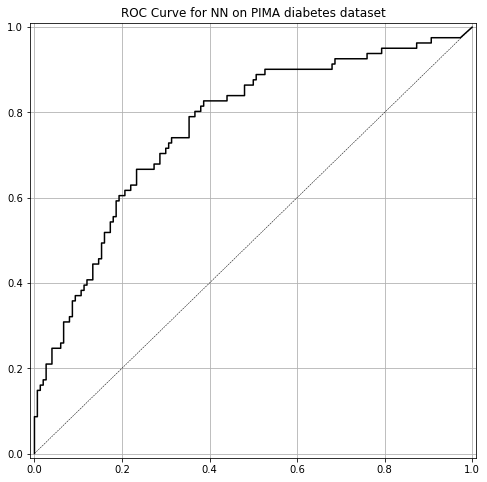

In [149]:
# Print model performance and plot the roc curve
print('Accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_2)))
print('ROC-AUC is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_2)))

plot_roc(y_test, y_pred_prob_nn_2, 'NN')

#### Accuracy obtained is 72.7% and AUC-ROC curve is 0.765

We see that there is a slight drop in accuracy and AUC-ROC curve. 

In [150]:
run_hist_400.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

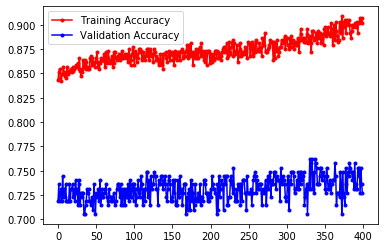

In [164]:
#plotting the curve to check training and validation accuracy
fig, ax = plt.subplots()
ax.plot(run_hist_400.history["acc"],'r', marker='.', label="Training Accuracy")
ax.plot(run_hist_400.history["val_acc"],'b', marker='.', label="Validation Accuracy")
ax.legend()

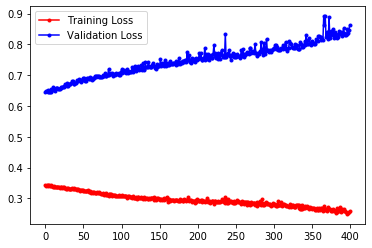

In [165]:
#Plotting the curve to see the training and validation loss of the model.
fig, ax = plt.subplots()
ax.plot(run_hist_400.history["loss"],'r', marker='.', label="Training Loss")
ax.plot(run_hist_400.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

#### Increasing the number of iterations to 600 and check the performance of the model. 

Lets now increase number of epochs to 600 and check the performance of the model. 

In [172]:
run_hist_600 = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=600)

Train on 537 samples, validate on 231 samples
Epoch 1/600
537/537 [==============================] - 0s 377us/step - loss: 0.0887 - acc: 0.9683 - val_loss: 1.9734 - val_acc: 0.7403
Epoch 2/600
537/537 [==============================] - 0s 65us/step - loss: 0.1212 - acc: 0.9553 - val_loss: 1.9484 - val_acc: 0.7143
Epoch 3/600
537/537 [==============================] - 0s 63us/step - loss: 0.0970 - acc: 0.9646 - val_loss: 1.9048 - val_acc: 0.7359
Epoch 4/600
537/537 [==============================] - 0s 69us/step - loss: 0.0909 - acc: 0.9758 - val_loss: 1.9194 - val_acc: 0.7229
Epoch 5/600
537/537 [==============================] - 0s 74us/step - loss: 0.0920 - acc: 0.9646 - val_loss: 1.9392 - val_acc: 0.7316
Epoch 6/600
537/537 [==============================] - 0s 63us/step - loss: 0.0859 - acc: 0.9702 - val_loss: 1.9666 - val_acc: 0.7359
Epoch 7/600
537/537 [==============================] - 0s 158us/step - loss: 0.0862 - acc: 0.9683 - val_loss: 2.0328 - val_acc: 0.7186
Epoch 8/600
53

537/537 [==============================] - 0s 71us/step - loss: 0.1213 - acc: 0.9590 - val_loss: 2.2151 - val_acc: 0.6926
Epoch 62/600
537/537 [==============================] - 0s 59us/step - loss: 0.1452 - acc: 0.9460 - val_loss: 1.9782 - val_acc: 0.7316
Epoch 63/600
537/537 [==============================] - 0s 65us/step - loss: 0.1623 - acc: 0.9367 - val_loss: 2.1092 - val_acc: 0.7186
Epoch 64/600
537/537 [==============================] - 0s 61us/step - loss: 0.1235 - acc: 0.9628 - val_loss: 1.9735 - val_acc: 0.7143
Epoch 65/600
537/537 [==============================] - 0s 123us/step - loss: 0.0961 - acc: 0.9609 - val_loss: 2.0310 - val_acc: 0.7056
Epoch 66/600
537/537 [==============================] - 0s 67us/step - loss: 0.1208 - acc: 0.9609 - val_loss: 1.9706 - val_acc: 0.7143
Epoch 67/600
537/537 [==============================] - 0s 70us/step - loss: 0.1109 - acc: 0.9609 - val_loss: 2.0209 - val_acc: 0.6970
Epoch 68/600
537/537 [==============================] - 0s 89us/ste

537/537 [==============================] - 0s 219us/step - loss: 0.0969 - acc: 0.9628 - val_loss: 2.0612 - val_acc: 0.7143
Epoch 122/600
537/537 [==============================] - 0s 68us/step - loss: 0.0860 - acc: 0.9739 - val_loss: 1.9917 - val_acc: 0.7229
Epoch 123/600
537/537 [==============================] - 0s 199us/step - loss: 0.2517 - acc: 0.9236 - val_loss: 2.0582 - val_acc: 0.6926
Epoch 124/600
537/537 [==============================] - 0s 182us/step - loss: 0.1069 - acc: 0.9628 - val_loss: 1.9741 - val_acc: 0.7273
Epoch 125/600
537/537 [==============================] - 0s 141us/step - loss: 0.1043 - acc: 0.9590 - val_loss: 1.9577 - val_acc: 0.7229
Epoch 126/600
537/537 [==============================] - 0s 332us/step - loss: 0.1021 - acc: 0.9590 - val_loss: 2.0125 - val_acc: 0.7100
Epoch 127/600
537/537 [==============================] - 0s 109us/step - loss: 0.1327 - acc: 0.9479 - val_loss: 1.9727 - val_acc: 0.7229
Epoch 128/600
537/537 [==============================] -

537/537 [==============================] - 0s 113us/step - loss: 0.0900 - acc: 0.9683 - val_loss: 2.0383 - val_acc: 0.7229
Epoch 181/600
537/537 [==============================] - 0s 152us/step - loss: 0.0973 - acc: 0.9646 - val_loss: 1.9938 - val_acc: 0.7229
Epoch 182/600
537/537 [==============================] - 0s 119us/step - loss: 0.0820 - acc: 0.9665 - val_loss: 2.0032 - val_acc: 0.7143
Epoch 183/600
537/537 [==============================] - 0s 117us/step - loss: 0.0793 - acc: 0.9758 - val_loss: 2.0208 - val_acc: 0.7229
Epoch 184/600
537/537 [==============================] - 0s 195us/step - loss: 0.0800 - acc: 0.9777 - val_loss: 1.9640 - val_acc: 0.7229
Epoch 185/600
537/537 [==============================] - 0s 321us/step - loss: 0.0962 - acc: 0.9609 - val_loss: 1.9881 - val_acc: 0.7186
Epoch 186/600
537/537 [==============================] - 0s 85us/step - loss: 0.0783 - acc: 0.9721 - val_loss: 1.9991 - val_acc: 0.7229
Epoch 187/600
537/537 [==============================] -

537/537 [==============================] - 0s 178us/step - loss: 0.1044 - acc: 0.9646 - val_loss: 2.0791 - val_acc: 0.7316
Epoch 241/600
537/537 [==============================] - 0s 171us/step - loss: 0.0856 - acc: 0.9683 - val_loss: 2.1194 - val_acc: 0.7229
Epoch 242/600
537/537 [==============================] - 0s 65us/step - loss: 0.1693 - acc: 0.9330 - val_loss: 2.0249 - val_acc: 0.7316
Epoch 243/600
537/537 [==============================] - 0s 72us/step - loss: 0.1515 - acc: 0.9330 - val_loss: 2.1296 - val_acc: 0.7359
Epoch 244/600
537/537 [==============================] - 0s 69us/step - loss: 0.1752 - acc: 0.9367 - val_loss: 2.1580 - val_acc: 0.7186
Epoch 245/600
537/537 [==============================] - 0s 180us/step - loss: 0.1125 - acc: 0.9646 - val_loss: 1.9832 - val_acc: 0.7316
Epoch 246/600
537/537 [==============================] - 0s 98us/step - loss: 0.0972 - acc: 0.9609 - val_loss: 2.0070 - val_acc: 0.7186
Epoch 247/600
537/537 [==============================] - 0s

537/537 [==============================] - ETA: 0s - loss: 0.0714 - acc: 0.972 - 0s 318us/step - loss: 0.0699 - acc: 0.9739 - val_loss: 2.0532 - val_acc: 0.7143
Epoch 301/600
537/537 [==============================] - 0s 137us/step - loss: 0.0746 - acc: 0.9702 - val_loss: 2.0788 - val_acc: 0.7186
Epoch 302/600
537/537 [==============================] - 0s 212us/step - loss: 0.0921 - acc: 0.9609 - val_loss: 2.0604 - val_acc: 0.7186
Epoch 303/600
537/537 [==============================] - 0s 173us/step - loss: 0.0831 - acc: 0.9665 - val_loss: 2.0594 - val_acc: 0.7186
Epoch 304/600
537/537 [==============================] - 0s 215us/step - loss: 0.1184 - acc: 0.9516 - val_loss: 2.1053 - val_acc: 0.7100
Epoch 305/600
537/537 [==============================] - 0s 174us/step - loss: 0.0858 - acc: 0.9739 - val_loss: 2.0296 - val_acc: 0.7143
Epoch 306/600
537/537 [==============================] - 0s 296us/step - loss: 0.1565 - acc: 0.9497 - val_loss: 2.0371 - val_acc: 0.7186
Epoch 307/600
537

Epoch 360/600
537/537 [==============================] - 0s 58us/step - loss: 0.1123 - acc: 0.9590 - val_loss: 2.0403 - val_acc: 0.7186
Epoch 361/600
537/537 [==============================] - 0s 74us/step - loss: 0.0833 - acc: 0.9665 - val_loss: 2.1100 - val_acc: 0.7316
Epoch 362/600
537/537 [==============================] - 0s 137us/step - loss: 0.0849 - acc: 0.9721 - val_loss: 2.1330 - val_acc: 0.7143
Epoch 363/600
537/537 [==============================] - 0s 106us/step - loss: 0.0788 - acc: 0.9702 - val_loss: 2.0569 - val_acc: 0.7273
Epoch 364/600
537/537 [==============================] - 0s 327us/step - loss: 0.0687 - acc: 0.9739 - val_loss: 2.0578 - val_acc: 0.7316
Epoch 365/600
537/537 [==============================] - 0s 117us/step - loss: 0.0776 - acc: 0.9777 - val_loss: 2.0895 - val_acc: 0.7186
Epoch 366/600
537/537 [==============================] - 0s 171us/step - loss: 0.0981 - acc: 0.9665 - val_loss: 2.1161 - val_acc: 0.7100
Epoch 367/600
537/537 [====================

Epoch 420/600
537/537 [==============================] - 0s 147us/step - loss: 0.1290 - acc: 0.9572 - val_loss: 2.1111 - val_acc: 0.7056
Epoch 421/600
537/537 [==============================] - 0s 74us/step - loss: 0.0939 - acc: 0.9646 - val_loss: 2.1557 - val_acc: 0.6970
Epoch 422/600
537/537 [==============================] - 0s 283us/step - loss: 0.1348 - acc: 0.9423 - val_loss: 2.1944 - val_acc: 0.6970
Epoch 423/600
537/537 [==============================] - 0s 204us/step - loss: 0.1158 - acc: 0.9665 - val_loss: 2.1260 - val_acc: 0.7100
Epoch 424/600
537/537 [==============================] - 0s 149us/step - loss: 0.1128 - acc: 0.9646 - val_loss: 2.1121 - val_acc: 0.7229
Epoch 425/600
537/537 [==============================] - 0s 95us/step - loss: 0.1055 - acc: 0.9628 - val_loss: 2.1253 - val_acc: 0.7229
Epoch 426/600
537/537 [==============================] - 0s 176us/step - loss: 0.0853 - acc: 0.9646 - val_loss: 2.1332 - val_acc: 0.7100
Epoch 427/600
537/537 [====================

Epoch 480/600
537/537 [==============================] - 0s 95us/step - loss: 0.1851 - acc: 0.9423 - val_loss: 2.2024 - val_acc: 0.7359
Epoch 481/600
537/537 [==============================] - 0s 284us/step - loss: 0.1213 - acc: 0.9572 - val_loss: 2.2285 - val_acc: 0.7143
Epoch 482/600
537/537 [==============================] - 0s 169us/step - loss: 0.1201 - acc: 0.9665 - val_loss: 2.0968 - val_acc: 0.7186
Epoch 483/600
537/537 [==============================] - 0s 167us/step - loss: 0.0983 - acc: 0.9628 - val_loss: 2.1128 - val_acc: 0.7273
Epoch 484/600
537/537 [==============================] - 0s 108us/step - loss: 0.0865 - acc: 0.9665 - val_loss: 2.1604 - val_acc: 0.7186
Epoch 485/600
537/537 [==============================] - 0s 145us/step - loss: 0.0768 - acc: 0.9721 - val_loss: 2.0983 - val_acc: 0.7143
Epoch 486/600
537/537 [==============================] - 0s 195us/step - loss: 0.1837 - acc: 0.9423 - val_loss: 2.0630 - val_acc: 0.7359
Epoch 487/600
537/537 [===================

537/537 [==============================] - 0s 188us/step - loss: 0.0842 - acc: 0.9628 - val_loss: 2.1927 - val_acc: 0.7100
Epoch 540/600
537/537 [==============================] - 0s 191us/step - loss: 0.0962 - acc: 0.9665 - val_loss: 2.1382 - val_acc: 0.7143
Epoch 541/600
537/537 [==============================] - 0s 128us/step - loss: 0.1989 - acc: 0.9367 - val_loss: 2.2932 - val_acc: 0.7143
Epoch 542/600
537/537 [==============================] - 0s 108us/step - loss: 0.0843 - acc: 0.9702 - val_loss: 2.1504 - val_acc: 0.7229
Epoch 543/600
537/537 [==============================] - 0s 117us/step - loss: 0.1179 - acc: 0.9553 - val_loss: 2.1303 - val_acc: 0.7229
Epoch 544/600
537/537 [==============================] - 0s 141us/step - loss: 0.0874 - acc: 0.9646 - val_loss: 2.1346 - val_acc: 0.7229
Epoch 545/600
537/537 [==============================] - 0s 373us/step - loss: 0.0981 - acc: 0.9590 - val_loss: 2.1783 - val_acc: 0.7273
Epoch 546/600
537/537 [==============================] 

Epoch 599/600
537/537 [==============================] - 0s 150us/step - loss: 0.0876 - acc: 0.9683 - val_loss: 2.1920 - val_acc: 0.7186
Epoch 600/600
537/537 [==============================] - 0s 160us/step - loss: 0.0943 - acc: 0.9665 - val_loss: 2.1339 - val_acc: 0.7186


In [234]:
# predicting the outcome after the data is fit into the model.
y_pred_class_nn_600 = model.predict_classes(X_test_norm)
y_pred_prob_nn_600 = model.predict(X_test_norm)

Accuracy is 0.719
ROC-AUC is 0.750


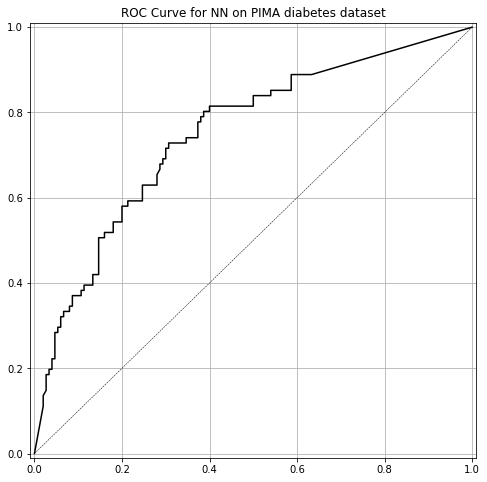

In [174]:
# Print model performance and plot the roc curve
print('Accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_600)))
print('ROC-AUC is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_600)))

plot_roc(y_test, y_pred_prob_nn_600, 'NN')

#### Accuracy obtained is 71.9% and AUC-ROC curve is 0.750


In [175]:
run_hist_600.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

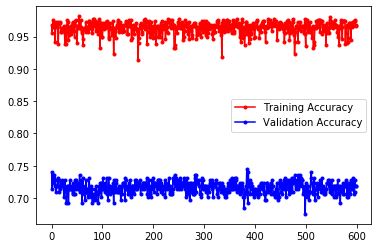

In [176]:
#plotting the curve to check training and validation accuracy
fig, ax = plt.subplots()
ax.plot(run_hist_600.history["acc"],'r', marker='.', label="Training Accuracy")
ax.plot(run_hist_600.history["val_acc"],'b', marker='.', label="Validation Accuracy")
ax.legend()

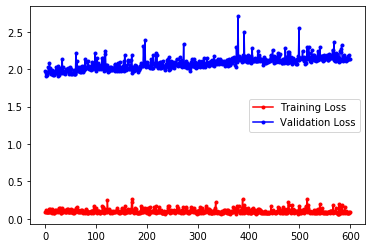

In [177]:
fig, ax = plt.subplots()
ax.plot(run_hist_600.history["loss"],'r', marker='.', label="Training Loss")
ax.plot(run_hist_600.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

We see that 200 epochs in the above model gave the best accuracy, when we started increasing the number of epochs to 400 and 600 then accuracy was either constant or slightly dropped which means that model is not learning any furthur with increase in number of epochs. 

Inorder to improve the model, we need to modify the learning rate to see if there is any improvement. 

In [433]:
sgd = SGD(lr=1e-3)
model.compile(loss="binary_crossentropy",optimizer=adam, metrics=["accuracy"],sample_weight_mode=None)


In [434]:
run_hist_200 = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), verbose=1, epochs=200)

Train on 537 samples, validate on 231 samples
Epoch 1/200
537/537 [==============================] - 2s 4ms/step - loss: 0.1128 - acc: 0.9683 - val_loss: 1.4446 - val_acc: 0.7273
Epoch 2/200
537/537 [==============================] - 0s 126us/step - loss: 0.1121 - acc: 0.9683 - val_loss: 1.4423 - val_acc: 0.7229
Epoch 3/200
537/537 [==============================] - 0s 357us/step - loss: 0.1120 - acc: 0.9702 - val_loss: 1.4509 - val_acc: 0.7229
Epoch 4/200
537/537 [==============================] - 0s 152us/step - loss: 0.1118 - acc: 0.9683 - val_loss: 1.4422 - val_acc: 0.7229
Epoch 5/200
 32/537 [>.............................] - ETA: 0s - loss: 0.1069 - acc: 0.9375

C:\Users\Ashmita\Anaconda3\Anaconda_new\envs\tensorflow_cpu\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113869). Check your callbacks.
  % delta_t_median)


537/537 [==============================] - 0s 397us/step - loss: 0.1116 - acc: 0.9683 - val_loss: 1.4482 - val_acc: 0.7229
Epoch 6/200
537/537 [==============================] - 0s 407us/step - loss: 0.1117 - acc: 0.9665 - val_loss: 1.4442 - val_acc: 0.7229
Epoch 7/200
537/537 [==============================] - 0s 212us/step - loss: 0.1107 - acc: 0.9665 - val_loss: 1.4463 - val_acc: 0.7229
Epoch 8/200
537/537 [==============================] - 0s 186us/step - loss: 0.1109 - acc: 0.9665 - val_loss: 1.4504 - val_acc: 0.7229
Epoch 9/200
537/537 [==============================] - 0s 93us/step - loss: 0.1108 - acc: 0.9665 - val_loss: 1.4499 - val_acc: 0.7229
Epoch 10/200
537/537 [==============================] - 0s 221us/step - loss: 0.1108 - acc: 0.9665 - val_loss: 1.4486 - val_acc: 0.7229
Epoch 11/200
537/537 [==============================] - 0s 110us/step - loss: 0.1108 - acc: 0.9665 - val_loss: 1.4478 - val_acc: 0.7229
Epoch 12/200
537/537 [==============================] - 0s 310us/s

537/537 [==============================] - 0s 273us/step - loss: 0.1100 - acc: 0.9665 - val_loss: 1.4502 - val_acc: 0.7229
Epoch 66/200
537/537 [==============================] - 0s 144us/step - loss: 0.1099 - acc: 0.9665 - val_loss: 1.4506 - val_acc: 0.7229
Epoch 67/200
537/537 [==============================] - 0s 223us/step - loss: 0.1099 - acc: 0.9665 - val_loss: 1.4525 - val_acc: 0.7229
Epoch 68/200
537/537 [==============================] - 0s 133us/step - loss: 0.1099 - acc: 0.9665 - val_loss: 1.4512 - val_acc: 0.7229
Epoch 69/200
537/537 [==============================] - 0s 130us/step - loss: 0.1099 - acc: 0.9665 - val_loss: 1.4510 - val_acc: 0.7229
Epoch 70/200
537/537 [==============================] - 0s 108us/step - loss: 0.1099 - acc: 0.9665 - val_loss: 1.4522 - val_acc: 0.7229
Epoch 71/200
537/537 [==============================] - 0s 191us/step - loss: 0.1100 - acc: 0.9665 - val_loss: 1.4520 - val_acc: 0.7229
Epoch 72/200
537/537 [==============================] - 0s 24

Epoch 125/200
537/537 [==============================] - 0s 230us/step - loss: 0.1096 - acc: 0.9665 - val_loss: 1.4544 - val_acc: 0.7229
Epoch 126/200
537/537 [==============================] - 0s 188us/step - loss: 0.1096 - acc: 0.9665 - val_loss: 1.4559 - val_acc: 0.7229
Epoch 127/200
537/537 [==============================] - 0s 145us/step - loss: 0.1095 - acc: 0.9665 - val_loss: 1.4553 - val_acc: 0.7229
Epoch 128/200
537/537 [==============================] - 0s 204us/step - loss: 0.1095 - acc: 0.9665 - val_loss: 1.4551 - val_acc: 0.7229
Epoch 129/200
537/537 [==============================] - 0s 171us/step - loss: 0.1096 - acc: 0.9665 - val_loss: 1.4549 - val_acc: 0.7229
Epoch 130/200
537/537 [==============================] - 0s 203us/step - loss: 0.1094 - acc: 0.9665 - val_loss: 1.4550 - val_acc: 0.7229
Epoch 131/200
537/537 [==============================] - 0s 204us/step - loss: 0.1095 - acc: 0.9665 - val_loss: 1.4557 - val_acc: 0.7229
Epoch 132/200
537/537 [==================

537/537 [==============================] - 0s 165us/step - loss: 0.1093 - acc: 0.9665 - val_loss: 1.4573 - val_acc: 0.7229
Epoch 185/200
537/537 [==============================] - 0s 176us/step - loss: 0.1092 - acc: 0.9665 - val_loss: 1.4574 - val_acc: 0.7229
Epoch 186/200
537/537 [==============================] - 0s 169us/step - loss: 0.1091 - acc: 0.9665 - val_loss: 1.4573 - val_acc: 0.7229
Epoch 187/200
537/537 [==============================] - 0s 111us/step - loss: 0.1091 - acc: 0.9665 - val_loss: 1.4573 - val_acc: 0.7229
Epoch 188/200
537/537 [==============================] - 0s 121us/step - loss: 0.1091 - acc: 0.9665 - val_loss: 1.4576 - val_acc: 0.7229
Epoch 189/200
537/537 [==============================] - 0s 117us/step - loss: 0.1091 - acc: 0.9665 - val_loss: 1.4568 - val_acc: 0.7229
Epoch 190/200
537/537 [==============================] - 0s 184us/step - loss: 0.1091 - acc: 0.9665 - val_loss: 1.4573 - val_acc: 0.7229
Epoch 191/200
537/537 [==============================] 

In [435]:
y_pred_class_nn_200 = model.predict_classes(X_test_norm)
y_pred_prob_nn_200 = model.predict(X_test_norm)

Accuracy is 0.723
ROC-AUC is 0.781


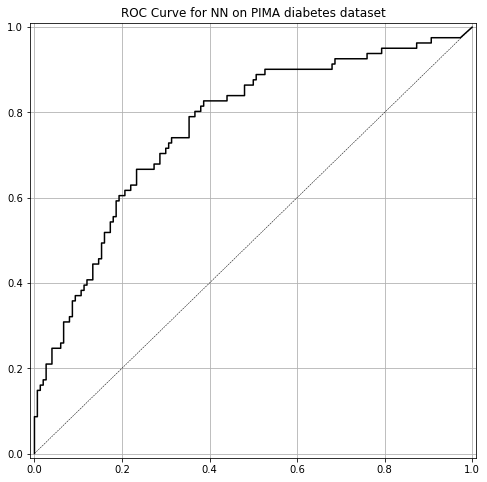

In [436]:
# Print model performance and plot the roc curve
print('Accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_200)))
print('ROC-AUC is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_200)))

plot_roc(y_test, y_pred_prob_nn_2, 'NN')

#### Accuracy obtained is 72.3% and ROC-AUC is 0.781

Plotting the curve for training and validation accuracy. 

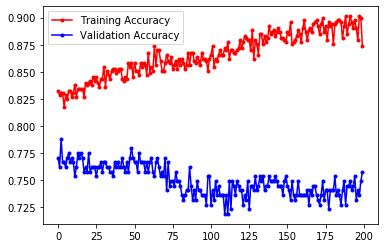

In [437]:
#plotting the curve to check training and validation accuracy
fig, ax = plt.subplots()
ax.plot(run_hist_600.history["acc"],'r', marker='.', label="Training Accuracy")
ax.plot(run_hist_600.history["val_acc"],'b', marker='.', label="Validation Accuracy")
ax.legend()

Plotting the curve for training and validation loss of the model. 

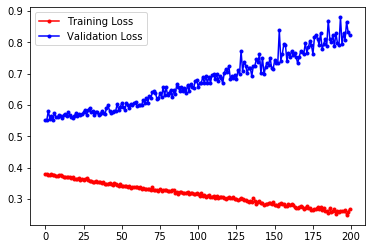

In [438]:
fig, ax = plt.subplots()
ax.plot(run_hist_600.history["loss"],'r', marker='.', label="Training Loss")
ax.plot(run_hist_600.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

We see that there is not much improvement in Accuracy and ROC-AUC curve values. Hence we need to fine tune the model to improve the performance. We need to check for different learning rates, optimizers such as adam or RMSprop or sgd if the values improve. 

Now let's try developing a more complex model with more number of layers and check the performance of the model.

### Trying to build another model with more number of hidden layers

In [448]:
nn_model_2 = Sequential()
nn_model_2.add(Dense(64, input_shape=(8,), activation="relu"))
nn_model_2.add(Dense(32, activation="relu"))
nn_model_2.add(Dense(16, activation="relu"))
nn_model_2.add(Dense(8,  activation="relu"))
nn_model_2.add(Dense(1, activation ="sigmoid"))


In [449]:
nn_model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_98 (Dense)             (None, 64)                576       
_________________________________________________________________
dense_99 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_100 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_101 (Dense)            (None, 8)                 136       
_________________________________________________________________
dense_102 (Dense)            (None, 1)                 9         
Total params: 3,329
Trainable params: 3,329
Non-trainable params: 0
_________________________________________________________________


In [460]:
sgd = SGD(lr=1e-3, momentum=0.9)
nn_model_2.compile(loss="binary_crossentropy", optimizer=sgd,metrics=["accuracy"])
run_hist_2 = nn_model_2.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)

Train on 537 samples, validate on 231 samples
Epoch 1/200
537/537 [==============================] - 3s 5ms/step - loss: 0.5365 - acc: 0.7076 - val_loss: 0.5408 - val_acc: 0.7316
Epoch 2/200
537/537 [==============================] - 0s 143us/step - loss: 0.5328 - acc: 0.7244 - val_loss: 0.5362 - val_acc: 0.7316
Epoch 3/200
537/537 [==============================] - 0s 208us/step - loss: 0.5281 - acc: 0.7263 - val_loss: 0.5317 - val_acc: 0.7489
Epoch 4/200
537/537 [==============================] - 0s 134us/step - loss: 0.5233 - acc: 0.7337 - val_loss: 0.5279 - val_acc: 0.7662
Epoch 5/200
537/537 [==============================] - 0s 240us/step - loss: 0.5193 - acc: 0.7374 - val_loss: 0.5235 - val_acc: 0.7749
Epoch 6/200
537/537 [==============================] - 0s 236us/step - loss: 0.5151 - acc: 0.7393 - val_loss: 0.5197 - val_acc: 0.7835
Epoch 7/200
537/537 [==============================] - 0s 100us/step - loss: 0.5109 - acc: 0.7486 - val_loss: 0.5161 - val_acc: 0.7879
Epoch 8/200

Epoch 61/200
537/537 [==============================] - 0s 199us/step - loss: 0.4253 - acc: 0.7970 - val_loss: 0.4724 - val_acc: 0.7792
Epoch 62/200
537/537 [==============================] - 0s 243us/step - loss: 0.4239 - acc: 0.7914 - val_loss: 0.4729 - val_acc: 0.7792
Epoch 63/200
537/537 [==============================] - 0s 188us/step - loss: 0.4229 - acc: 0.7896 - val_loss: 0.4729 - val_acc: 0.7792
Epoch 64/200
537/537 [==============================] - 0s 147us/step - loss: 0.4236 - acc: 0.7933 - val_loss: 0.4739 - val_acc: 0.7835
Epoch 65/200
537/537 [==============================] - 0s 249us/step - loss: 0.4230 - acc: 0.7970 - val_loss: 0.4730 - val_acc: 0.7792
Epoch 66/200
537/537 [==============================] - 0s 150us/step - loss: 0.4206 - acc: 0.7952 - val_loss: 0.4735 - val_acc: 0.7792
Epoch 67/200
537/537 [==============================] - 0s 279us/step - loss: 0.4199 - acc: 0.7952 - val_loss: 0.4740 - val_acc: 0.7835
Epoch 68/200
537/537 [==========================

537/537 [==============================] - 0s 195us/step - loss: 0.3807 - acc: 0.8212 - val_loss: 0.5067 - val_acc: 0.7749
Epoch 122/200
537/537 [==============================] - 0s 199us/step - loss: 0.3800 - acc: 0.8212 - val_loss: 0.5073 - val_acc: 0.7792
Epoch 123/200
537/537 [==============================] - 0s 191us/step - loss: 0.3799 - acc: 0.8212 - val_loss: 0.5076 - val_acc: 0.7792
Epoch 124/200
537/537 [==============================] - 0s 176us/step - loss: 0.3782 - acc: 0.8250 - val_loss: 0.5087 - val_acc: 0.7792
Epoch 125/200
537/537 [==============================] - 0s 234us/step - loss: 0.3780 - acc: 0.8212 - val_loss: 0.5094 - val_acc: 0.7792
Epoch 126/200
537/537 [==============================] - 0s 160us/step - loss: 0.3774 - acc: 0.8231 - val_loss: 0.5100 - val_acc: 0.7792
Epoch 127/200
537/537 [==============================] - 0s 225us/step - loss: 0.3767 - acc: 0.8268 - val_loss: 0.5109 - val_acc: 0.7835
Epoch 128/200
537/537 [==============================] 

537/537 [==============================] - 0s 306us/step - loss: 0.3406 - acc: 0.8566 - val_loss: 0.5493 - val_acc: 0.7792
Epoch 181/200
537/537 [==============================] - 0s 583us/step - loss: 0.3413 - acc: 0.8566 - val_loss: 0.5505 - val_acc: 0.7835
Epoch 182/200
537/537 [==============================] - 0s 556us/step - loss: 0.3401 - acc: 0.8585 - val_loss: 0.5509 - val_acc: 0.7792
Epoch 183/200
537/537 [==============================] - 0s 272us/step - loss: 0.3394 - acc: 0.8566 - val_loss: 0.5516 - val_acc: 0.7835
Epoch 184/200
537/537 [==============================] - 0s 243us/step - loss: 0.3387 - acc: 0.8622 - val_loss: 0.5528 - val_acc: 0.7749
Epoch 185/200
537/537 [==============================] - 0s 280us/step - loss: 0.3381 - acc: 0.8566 - val_loss: 0.5557 - val_acc: 0.7749
Epoch 186/200
537/537 [==============================] - 0s 686us/step - loss: 0.3361 - acc: 0.8622 - val_loss: 0.5539 - val_acc: 0.7792
Epoch 187/200
537/537 [==============================] 

In [461]:
y_pred_class_nn_mod2 = model.predict_classes(X_test_norm)
y_pred_prob_nn_mod2 = model.predict(X_test_norm)

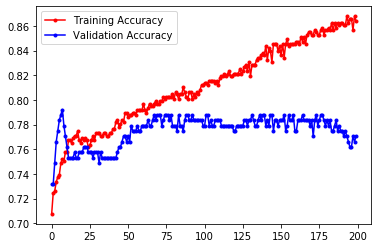

In [462]:
#plotting the curve to check training and validation accuracy
fig, ax = plt.subplots()
ax.plot(run_hist_2.history["acc"],'r', marker='.', label="Training Accuracy")
ax.plot(run_hist_2.history["val_acc"],'b', marker='.', label="Validation Accuracy")
ax.legend()

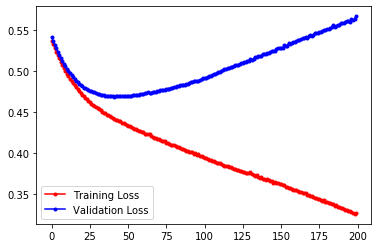

In [463]:
#Plotting curves for Training Loss and Validation loss
fig, ax = plt.subplots()
ax.plot(run_hist_2.history["loss"],'r', marker='.', label="Training Loss")
ax.plot(run_hist_2.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

accuracy is 0.723
roc-auc is 0.781


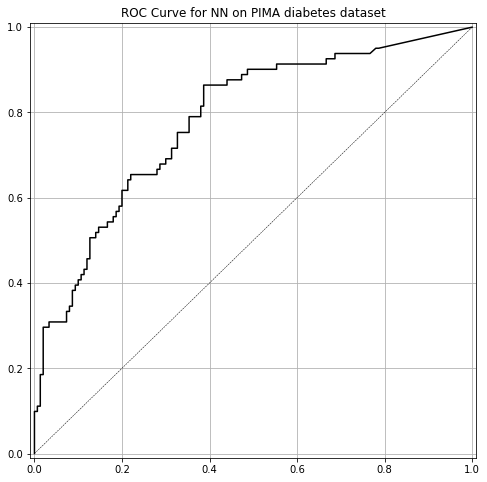

In [465]:
# Print model performance and plot the roc curve
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_mod2)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_mod2)))

plot_roc(y_test, y_pred_prob_nn_mod2, 'NN')

#### Accuracy obtained from this model is 72.3% for epochs=200 , learning rate=1e-3. 

Now let's try for 400 epochs. 

In [466]:
run_hist_400 = nn_model_2.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=400)

Train on 537 samples, validate on 231 samples
Epoch 1/400
537/537 [==============================] - 0s 158us/step - loss: 0.3285 - acc: 0.8547 - val_loss: 0.5635 - val_acc: 0.7662
Epoch 2/400
537/537 [==============================] - 0s 86us/step - loss: 0.3258 - acc: 0.8622 - val_loss: 0.5679 - val_acc: 0.7706
Epoch 3/400
537/537 [==============================] - 0s 80us/step - loss: 0.3259 - acc: 0.8585 - val_loss: 0.5669 - val_acc: 0.7662
Epoch 4/400
537/537 [==============================] - 0s 87us/step - loss: 0.3230 - acc: 0.8678 - val_loss: 0.5677 - val_acc: 0.7749
Epoch 5/400
537/537 [==============================] - 0s 87us/step - loss: 0.3233 - acc: 0.8603 - val_loss: 0.5673 - val_acc: 0.7662
Epoch 6/400
537/537 [==============================] - 0s 87us/step - loss: 0.3222 - acc: 0.8641 - val_loss: 0.5702 - val_acc: 0.7706
Epoch 7/400
537/537 [==============================] - 0s 100us/step - loss: 0.3206 - acc: 0.8678 - val_loss: 0.5694 - val_acc: 0.7749
Epoch 8/400
53

537/537 [==============================] - 0s 113us/step - loss: 0.2712 - acc: 0.8994 - val_loss: 0.6138 - val_acc: 0.7749
Epoch 62/400
537/537 [==============================] - 0s 100us/step - loss: 0.2705 - acc: 0.9013 - val_loss: 0.6156 - val_acc: 0.7749
Epoch 63/400
537/537 [==============================] - 0s 108us/step - loss: 0.2700 - acc: 0.9032 - val_loss: 0.6094 - val_acc: 0.7749
Epoch 64/400
537/537 [==============================] - 0s 154us/step - loss: 0.2710 - acc: 0.9013 - val_loss: 0.6184 - val_acc: 0.7792
Epoch 65/400
537/537 [==============================] - 0s 184us/step - loss: 0.2680 - acc: 0.9032 - val_loss: 0.6148 - val_acc: 0.7706
Epoch 66/400
537/537 [==============================] - 0s 191us/step - loss: 0.2662 - acc: 0.9032 - val_loss: 0.6168 - val_acc: 0.7749
Epoch 67/400
537/537 [==============================] - 0s 141us/step - loss: 0.2679 - acc: 0.9069 - val_loss: 0.6204 - val_acc: 0.7706
Epoch 68/400
537/537 [==============================] - 0s 10

537/537 [==============================] - 0s 247us/step - loss: 0.2111 - acc: 0.9385 - val_loss: 0.6813 - val_acc: 0.7619
Epoch 122/400
537/537 [==============================] - 0s 199us/step - loss: 0.2091 - acc: 0.9385 - val_loss: 0.6863 - val_acc: 0.7576
Epoch 123/400
537/537 [==============================] - 0s 143us/step - loss: 0.2080 - acc: 0.9292 - val_loss: 0.6766 - val_acc: 0.7619
Epoch 124/400
537/537 [==============================] - 0s 237us/step - loss: 0.2179 - acc: 0.9311 - val_loss: 0.7190 - val_acc: 0.7576
Epoch 125/400
537/537 [==============================] - 0s 297us/step - loss: 0.2120 - acc: 0.9311 - val_loss: 0.6869 - val_acc: 0.7662
Epoch 126/400
537/537 [==============================] - 0s 262us/step - loss: 0.2039 - acc: 0.9348 - val_loss: 0.6827 - val_acc: 0.7576
Epoch 127/400
537/537 [==============================] - 0s 165us/step - loss: 0.2056 - acc: 0.9441 - val_loss: 0.7006 - val_acc: 0.7662
Epoch 128/400
537/537 [==============================] 

Epoch 181/400
537/537 [==============================] - 0s 431us/step - loss: 0.1495 - acc: 0.9534 - val_loss: 0.8108 - val_acc: 0.7316
Epoch 182/400
537/537 [==============================] - 1s 1ms/step - loss: 0.1490 - acc: 0.9497 - val_loss: 0.8019 - val_acc: 0.7403
Epoch 183/400
537/537 [==============================] - 0s 241us/step - loss: 0.1516 - acc: 0.9516 - val_loss: 0.8055 - val_acc: 0.7359
Epoch 184/400
537/537 [==============================] - 0s 158us/step - loss: 0.1480 - acc: 0.9497 - val_loss: 0.8100 - val_acc: 0.7359
Epoch 185/400
537/537 [==============================] - 0s 226us/step - loss: 0.1450 - acc: 0.9534 - val_loss: 0.8077 - val_acc: 0.7316
Epoch 186/400
537/537 [==============================] - 0s 141us/step - loss: 0.1456 - acc: 0.9572 - val_loss: 0.8091 - val_acc: 0.7446
Epoch 187/400
537/537 [==============================] - 0s 292us/step - loss: 0.1466 - acc: 0.9516 - val_loss: 0.8142 - val_acc: 0.7359
Epoch 188/400
537/537 [====================

Epoch 241/400
537/537 [==============================] - 0s 111us/step - loss: 0.1001 - acc: 0.9795 - val_loss: 0.9264 - val_acc: 0.7403
Epoch 242/400
537/537 [==============================] - 0s 172us/step - loss: 0.1008 - acc: 0.9739 - val_loss: 0.9039 - val_acc: 0.7403
Epoch 243/400
537/537 [==============================] - 0s 245us/step - loss: 0.0950 - acc: 0.9777 - val_loss: 0.9116 - val_acc: 0.7446
Epoch 244/400
537/537 [==============================] - 0s 203us/step - loss: 0.1072 - acc: 0.9628 - val_loss: 0.9059 - val_acc: 0.7403
Epoch 245/400
537/537 [==============================] - 0s 260us/step - loss: 0.1062 - acc: 0.9702 - val_loss: 0.9040 - val_acc: 0.7446
Epoch 246/400
537/537 [==============================] - 0s 221us/step - loss: 0.0979 - acc: 0.9739 - val_loss: 0.9256 - val_acc: 0.7186
Epoch 247/400
537/537 [==============================] - 0s 150us/step - loss: 0.0960 - acc: 0.9758 - val_loss: 0.9130 - val_acc: 0.7446
Epoch 248/400
537/537 [==================

537/537 [==============================] - 0s 297us/step - loss: 0.0634 - acc: 0.9907 - val_loss: 1.0640 - val_acc: 0.7359
Epoch 301/400
537/537 [==============================] - 0s 143us/step - loss: 0.0623 - acc: 0.9870 - val_loss: 1.0616 - val_acc: 0.7316
Epoch 302/400
537/537 [==============================] - 0s 162us/step - loss: 0.0620 - acc: 0.9870 - val_loss: 1.0948 - val_acc: 0.7273
Epoch 303/400
537/537 [==============================] - 0s 169us/step - loss: 0.0648 - acc: 0.9851 - val_loss: 1.0450 - val_acc: 0.7273
Epoch 304/400
537/537 [==============================] - 0s 303us/step - loss: 0.0632 - acc: 0.9888 - val_loss: 1.0597 - val_acc: 0.7316
Epoch 305/400
537/537 [==============================] - 0s 165us/step - loss: 0.0655 - acc: 0.9888 - val_loss: 1.0847 - val_acc: 0.7403
Epoch 306/400
537/537 [==============================] - 0s 264us/step - loss: 0.0647 - acc: 0.9870 - val_loss: 1.0686 - val_acc: 0.7273
Epoch 307/400
537/537 [==============================] 

Epoch 360/400
537/537 [==============================] - 0s 217us/step - loss: 0.0421 - acc: 0.9907 - val_loss: 1.2041 - val_acc: 0.7359
Epoch 361/400
537/537 [==============================] - 0s 118us/step - loss: 0.0420 - acc: 0.9888 - val_loss: 1.2350 - val_acc: 0.7273
Epoch 362/400
537/537 [==============================] - 0s 286us/step - loss: 0.0431 - acc: 0.9907 - val_loss: 1.1923 - val_acc: 0.7273
Epoch 363/400
537/537 [==============================] - 0s 201us/step - loss: 0.0459 - acc: 0.9907 - val_loss: 1.2487 - val_acc: 0.7273
Epoch 364/400
537/537 [==============================] - 0s 178us/step - loss: 0.0500 - acc: 0.9832 - val_loss: 1.1796 - val_acc: 0.7229
Epoch 365/400
537/537 [==============================] - 0s 304us/step - loss: 0.0477 - acc: 0.9870 - val_loss: 1.2648 - val_acc: 0.7359
Epoch 366/400
537/537 [==============================] - 0s 212us/step - loss: 0.0419 - acc: 0.9870 - val_loss: 1.2157 - val_acc: 0.7316
Epoch 367/400
537/537 [==================

In [467]:
y_pred_class_nn_400 = nn_model_2.predict_classes(X_test_norm)
y_pred_prob_nn_400 = nn_model_2.predict(X_test_norm)

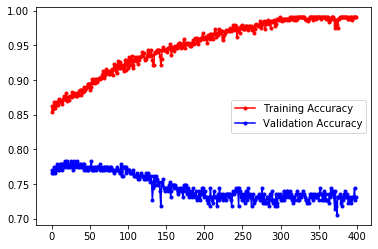

In [468]:
#plotting the curve to check training and validation accuracy
fig, ax = plt.subplots()
ax.plot(run_hist_400.history["acc"],'r', marker='.', label="Training Accuracy")
ax.plot(run_hist_400.history["val_acc"],'b', marker='.', label="Validation Accuracy")
ax.legend()

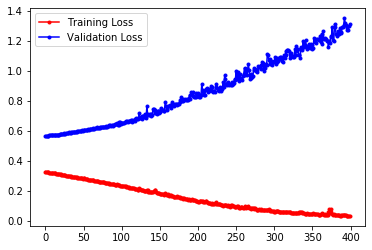

In [469]:
#Plotting curves for Training Loss and Validation loss
fig, ax = plt.subplots()
ax.plot(run_hist_400.history["loss"],'r', marker='.', label="Training Loss")
ax.plot(run_hist_400.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

accuracy is 0.732
roc-auc is 0.774


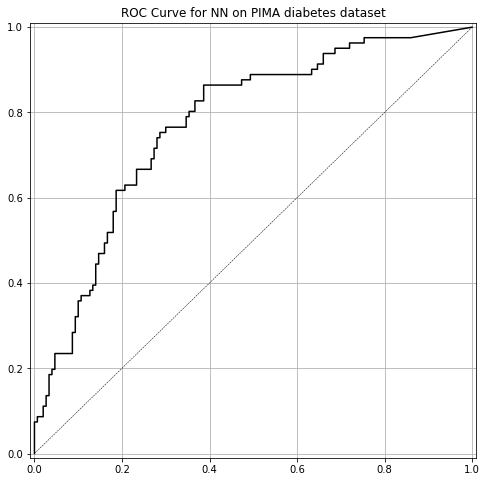

In [470]:
# Print model performance and plot the roc curve
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_400)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_400)))

plot_roc(y_test, y_pred_prob_nn_400, 'NN')

#### Accuracy obtained for epochs = 400 is 73.2%

We see that accuracy is slightly better than previous model. 

Now, let's check for epochs = 600 wherein model improves or not. 

In [481]:
run_hist_600 = nn_model_2.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=600)

Train on 537 samples, validate on 231 samples
Epoch 1/600
537/537 [==============================] - 0s 918us/step - loss: 4.6693e-04 - acc: 1.0000 - val_loss: 2.2036 - val_acc: 0.7100
Epoch 2/600
537/537 [==============================] - 0s 416us/step - loss: 4.6172e-04 - acc: 1.0000 - val_loss: 2.2038 - val_acc: 0.7100
Epoch 3/600
537/537 [==============================] - 0s 234us/step - loss: 4.6060e-04 - acc: 1.0000 - val_loss: 2.2041 - val_acc: 0.7100
Epoch 4/600
537/537 [==============================] - 0s 223us/step - loss: 4.6026e-04 - acc: 1.0000 - val_loss: 2.2040 - val_acc: 0.7100
Epoch 5/600
537/537 [==============================] - 0s 102us/step - loss: 4.6800e-04 - acc: 1.0000 - val_loss: 2.2045 - val_acc: 0.7100
Epoch 6/600
537/537 [==============================] - 0s 136us/step - loss: 4.6793e-04 - acc: 1.0000 - val_loss: 2.2032 - val_acc: 0.7100
Epoch 7/600
537/537 [==============================] - 0s 221us/step - loss: 4.6049e-04 - acc: 1.0000 - val_loss: 2.2042

537/537 [==============================] - 0s 206us/step - loss: 4.4240e-04 - acc: 1.0000 - val_loss: 2.2140 - val_acc: 0.7100
Epoch 60/600
537/537 [==============================] - 0s 182us/step - loss: 4.3932e-04 - acc: 1.0000 - val_loss: 2.2121 - val_acc: 0.7100
Epoch 61/600
537/537 [==============================] - 0s 158us/step - loss: 4.3847e-04 - acc: 1.0000 - val_loss: 2.2129 - val_acc: 0.7100
Epoch 62/600
537/537 [==============================] - 0s 225us/step - loss: 4.4233e-04 - acc: 1.0000 - val_loss: 2.2148 - val_acc: 0.7056
Epoch 63/600
537/537 [==============================] - 0s 161us/step - loss: 4.3761e-04 - acc: 1.0000 - val_loss: 2.2133 - val_acc: 0.7100
Epoch 64/600
537/537 [==============================] - 0s 587us/step - loss: 4.3836e-04 - acc: 1.0000 - val_loss: 2.2138 - val_acc: 0.7100
Epoch 65/600
537/537 [==============================] - 0s 245us/step - loss: 4.3878e-04 - acc: 1.0000 - val_loss: 2.2136 - val_acc: 0.7100
Epoch 66/600
537/537 [===========

537/537 [==============================] - 0s 342us/step - loss: 4.2242e-04 - acc: 1.0000 - val_loss: 2.2230 - val_acc: 0.7100
Epoch 118/600
537/537 [==============================] - 0s 184us/step - loss: 4.1775e-04 - acc: 1.0000 - val_loss: 2.2224 - val_acc: 0.7100
Epoch 119/600
537/537 [==============================] - 0s 123us/step - loss: 4.2317e-04 - acc: 1.0000 - val_loss: 2.2230 - val_acc: 0.7100
Epoch 120/600
537/537 [==============================] - 0s 163us/step - loss: 4.1784e-04 - acc: 1.0000 - val_loss: 2.2228 - val_acc: 0.7056
Epoch 121/600
537/537 [==============================] - 0s 130us/step - loss: 4.2132e-04 - acc: 1.0000 - val_loss: 2.2234 - val_acc: 0.7100
Epoch 122/600
537/537 [==============================] - 0s 409us/step - loss: 4.1708e-04 - acc: 1.0000 - val_loss: 2.2234 - val_acc: 0.7100
Epoch 123/600
537/537 [==============================] - 0s 275us/step - loss: 4.2857e-04 - acc: 1.0000 - val_loss: 2.2240 - val_acc: 0.7056
Epoch 124/600
537/537 [====

Epoch 175/600
537/537 [==============================] - 0s 202us/step - loss: 4.0163e-04 - acc: 1.0000 - val_loss: 2.2318 - val_acc: 0.7056
Epoch 176/600
537/537 [==============================] - 0s 252us/step - loss: 4.0096e-04 - acc: 1.0000 - val_loss: 2.2320 - val_acc: 0.7056
Epoch 177/600
537/537 [==============================] - 0s 186us/step - loss: 4.0311e-04 - acc: 1.0000 - val_loss: 2.2322 - val_acc: 0.7100
Epoch 178/600
537/537 [==============================] - 0s 256us/step - loss: 4.0412e-04 - acc: 1.0000 - val_loss: 2.2313 - val_acc: 0.7100
Epoch 179/600
537/537 [==============================] - 0s 178us/step - loss: 4.1663e-04 - acc: 1.0000 - val_loss: 2.2335 - val_acc: 0.7056
Epoch 180/600
537/537 [==============================] - 0s 353us/step - loss: 4.1015e-04 - acc: 1.0000 - val_loss: 2.2309 - val_acc: 0.7100
Epoch 181/600
537/537 [==============================] - 0s 299us/step - loss: 4.0230e-04 - acc: 1.0000 - val_loss: 2.2329 - val_acc: 0.7056
Epoch 182/600

Epoch 233/600
537/537 [==============================] - 0s 310us/step - loss: 3.8542e-04 - acc: 1.0000 - val_loss: 2.2402 - val_acc: 0.7100
Epoch 234/600
537/537 [==============================] - 0s 215us/step - loss: 3.9004e-04 - acc: 1.0000 - val_loss: 2.2420 - val_acc: 0.7056
Epoch 235/600
537/537 [==============================] - 0s 308us/step - loss: 3.9891e-04 - acc: 1.0000 - val_loss: 2.2398 - val_acc: 0.7100
Epoch 236/600
537/537 [==============================] - 0s 208us/step - loss: 3.8973e-04 - acc: 1.0000 - val_loss: 2.2413 - val_acc: 0.7056
Epoch 237/600
537/537 [==============================] - 0s 126us/step - loss: 3.8627e-04 - acc: 1.0000 - val_loss: 2.2410 - val_acc: 0.7100
Epoch 238/600
537/537 [==============================] - 0s 184us/step - loss: 3.8814e-04 - acc: 1.0000 - val_loss: 2.2415 - val_acc: 0.7100
Epoch 239/600
537/537 [==============================] - 0s 128us/step - loss: 3.9621e-04 - acc: 1.0000 - val_loss: 2.2396 - val_acc: 0.7056
Epoch 240/600

537/537 [==============================] - 0s 102us/step - loss: 3.7463e-04 - acc: 1.0000 - val_loss: 2.2484 - val_acc: 0.7056
Epoch 292/600
537/537 [==============================] - 0s 208us/step - loss: 3.7254e-04 - acc: 1.0000 - val_loss: 2.2492 - val_acc: 0.7056
Epoch 293/600
537/537 [==============================] - 0s 159us/step - loss: 3.6905e-04 - acc: 1.0000 - val_loss: 2.2496 - val_acc: 0.7056
Epoch 294/600
537/537 [==============================] - 0s 178us/step - loss: 3.7023e-04 - acc: 1.0000 - val_loss: 2.2498 - val_acc: 0.7056
Epoch 295/600
537/537 [==============================] - 0s 184us/step - loss: 3.7378e-04 - acc: 1.0000 - val_loss: 2.2496 - val_acc: 0.7056
Epoch 296/600
537/537 [==============================] - 0s 239us/step - loss: 3.7433e-04 - acc: 1.0000 - val_loss: 2.2501 - val_acc: 0.7056
Epoch 297/600
537/537 [==============================] - 0s 223us/step - loss: 3.6785e-04 - acc: 1.0000 - val_loss: 2.2493 - val_acc: 0.7056
Epoch 298/600
537/537 [====

Epoch 349/600
537/537 [==============================] - 0s 149us/step - loss: 3.4612e-04 - acc: 1.0000 - val_loss: 2.2573 - val_acc: 0.7100
Epoch 350/600
537/537 [==============================] - 0s 251us/step - loss: 3.4553e-04 - acc: 1.0000 - val_loss: 2.2564 - val_acc: 0.7100
Epoch 351/600
537/537 [==============================] - 0s 169us/step - loss: 3.4731e-04 - acc: 1.0000 - val_loss: 2.2559 - val_acc: 0.7100
Epoch 352/600
537/537 [==============================] - 0s 201us/step - loss: 3.4686e-04 - acc: 1.0000 - val_loss: 2.2579 - val_acc: 0.7100
Epoch 353/600
537/537 [==============================] - 0s 149us/step - loss: 3.4417e-04 - acc: 1.0000 - val_loss: 2.2574 - val_acc: 0.7100
Epoch 354/600
537/537 [==============================] - 0s 225us/step - loss: 3.4228e-04 - acc: 1.0000 - val_loss: 2.2574 - val_acc: 0.7100
Epoch 355/600
537/537 [==============================] - 0s 130us/step - loss: 3.4109e-04 - acc: 1.0000 - val_loss: 2.2568 - val_acc: 0.7100
Epoch 356/600

Epoch 407/600
537/537 [==============================] - 0s 112us/step - loss: 3.2207e-04 - acc: 1.0000 - val_loss: 2.2644 - val_acc: 0.7056
Epoch 408/600
537/537 [==============================] - 0s 401us/step - loss: 3.2405e-04 - acc: 1.0000 - val_loss: 2.2640 - val_acc: 0.7056
Epoch 409/600
537/537 [==============================] - 0s 100us/step - loss: 3.2019e-04 - acc: 1.0000 - val_loss: 2.2645 - val_acc: 0.7056
Epoch 410/600
537/537 [==============================] - 0s 106us/step - loss: 3.2193e-04 - acc: 1.0000 - val_loss: 2.2653 - val_acc: 0.7056
Epoch 411/600
537/537 [==============================] - 0s 156us/step - loss: 3.2215e-04 - acc: 1.0000 - val_loss: 2.2650 - val_acc: 0.7056
Epoch 412/600
537/537 [==============================] - 0s 145us/step - loss: 3.2075e-04 - acc: 1.0000 - val_loss: 2.2654 - val_acc: 0.7056
Epoch 413/600
537/537 [==============================] - 0s 180us/step - loss: 3.1988e-04 - acc: 1.0000 - val_loss: 2.2657 - val_acc: 0.7056
Epoch 414/600

537/537 [==============================] - 0s 106us/step - loss: 3.0903e-04 - acc: 1.0000 - val_loss: 2.2718 - val_acc: 0.7056
Epoch 466/600
537/537 [==============================] - 0s 145us/step - loss: 3.0848e-04 - acc: 1.0000 - val_loss: 2.2710 - val_acc: 0.7056
Epoch 467/600
537/537 [==============================] - 0s 104us/step - loss: 3.0741e-04 - acc: 1.0000 - val_loss: 2.2725 - val_acc: 0.7056
Epoch 468/600
537/537 [==============================] - ETA: 0s - loss: 4.6411e-04 - acc: 1.000 - 0s 114us/step - loss: 3.0773e-04 - acc: 1.0000 - val_loss: 2.2727 - val_acc: 0.7056
Epoch 469/600
537/537 [==============================] - 0s 93us/step - loss: 3.0973e-04 - acc: 1.0000 - val_loss: 2.2714 - val_acc: 0.7056
Epoch 470/600
537/537 [==============================] - 0s 179us/step - loss: 3.0740e-04 - acc: 1.0000 - val_loss: 2.2730 - val_acc: 0.7056
Epoch 471/600
537/537 [==============================] - 0s 117us/step - loss: 3.0790e-04 - acc: 1.0000 - val_loss: 2.2723 - va

Epoch 523/600
537/537 [==============================] - 0s 194us/step - loss: 2.9747e-04 - acc: 1.0000 - val_loss: 2.2788 - val_acc: 0.7056
Epoch 524/600
537/537 [==============================] - 0s 216us/step - loss: 2.9644e-04 - acc: 1.0000 - val_loss: 2.2777 - val_acc: 0.7056
Epoch 525/600
537/537 [==============================] - 0s 276us/step - loss: 2.9682e-04 - acc: 1.0000 - val_loss: 2.2784 - val_acc: 0.7056
Epoch 526/600
537/537 [==============================] - 0s 161us/step - loss: 2.9677e-04 - acc: 1.0000 - val_loss: 2.2785 - val_acc: 0.7056
Epoch 527/600
537/537 [==============================] - 0s 162us/step - loss: 2.9638e-04 - acc: 1.0000 - val_loss: 2.2789 - val_acc: 0.7056
Epoch 528/600
537/537 [==============================] - 0s 224us/step - loss: 2.9582e-04 - acc: 1.0000 - val_loss: 2.2782 - val_acc: 0.7056
Epoch 529/600
537/537 [==============================] - 0s 263us/step - loss: 2.9598e-04 - acc: 1.0000 - val_loss: 2.2782 - val_acc: 0.7056
Epoch 530/600

537/537 [==============================] - 0s 117us/step - loss: 2.8791e-04 - acc: 1.0000 - val_loss: 2.2846 - val_acc: 0.7056
Epoch 582/600
537/537 [==============================] - 0s 108us/step - loss: 2.8825e-04 - acc: 1.0000 - val_loss: 2.2848 - val_acc: 0.7056
Epoch 583/600
537/537 [==============================] - 0s 115us/step - loss: 2.8650e-04 - acc: 1.0000 - val_loss: 2.2857 - val_acc: 0.7056
Epoch 584/600
537/537 [==============================] - 0s 290us/step - loss: 2.8639e-04 - acc: 1.0000 - val_loss: 2.2850 - val_acc: 0.7056
Epoch 585/600
537/537 [==============================] - 0s 201us/step - loss: 2.8602e-04 - acc: 1.0000 - val_loss: 2.2856 - val_acc: 0.7056
Epoch 586/600
537/537 [==============================] - 0s 409us/step - loss: 2.8622e-04 - acc: 1.0000 - val_loss: 2.2862 - val_acc: 0.7056
Epoch 587/600
537/537 [==============================] - 0s 191us/step - loss: 2.8584e-04 - acc: 1.0000 - val_loss: 2.2855 - val_acc: 0.7056
Epoch 588/600
537/537 [====

In [482]:
y_pred_class_nn_600 = nn_model_2.predict_classes(X_test_norm)
y_pred_prob_nn_600 = nn_model_2.predict(X_test_norm)

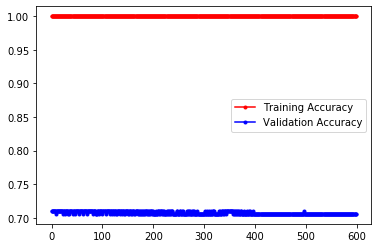

In [484]:
#plotting the curve to check training and validation accuracy
fig, ax = plt.subplots()
ax.plot(run_hist_600.history["acc"],'r', marker='.', label="Training Accuracy")
ax.plot(run_hist_600.history["val_acc"],'b', marker='.', label="Validation Accuracy")
ax.legend()

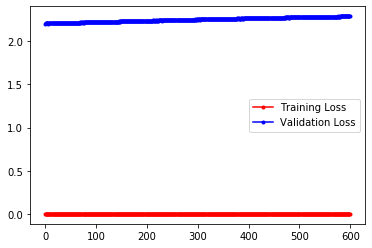

In [485]:
#Plotting curves for Training Loss and Validation loss
fig, ax = plt.subplots()
ax.plot(run_hist_600.history["loss"],'r', marker='.', label="Training Loss")
ax.plot(run_hist_600.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

accuracy is 0.706
roc-auc is 0.755


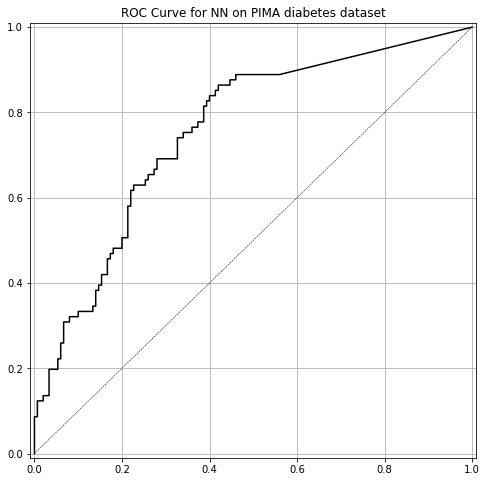

In [486]:
# Print model performance and plot the roc curve
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_600)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_600)))

plot_roc(y_test, y_pred_prob_nn_600, 'NN')

We observe that we reach an accuracy of 70.6% 

### Building more complex model

In [492]:
def model_4(model):
    model.add(Dense(1024, input_dim=8, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [493]:
model = Sequential()
model = model_4(model)

In [494]:
# compile the model
    model.compile(
        loss = 'binary_crossentropy',
        optimizer = SGD(lr=1e-4, decay=1e-6, momentum=0.9),
        metrics = ['accuracy']
    )

In [495]:
mystr = model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_103 (Dense)            (None, 1024)              9216      
_________________________________________________________________
dense_104 (Dense)            (None, 512)               524800    
_________________________________________________________________
dense_105 (Dense)            (None, 256)               131328    
_________________________________________________________________
dense_106 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_107 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_108 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_109 (Dense)            (None, 16)                528       
__________

In [496]:
# Train the model for the given number of epochs
    history = model.fit(
        X_train_norm, y_train,
        steps_per_epoch=10,
        epochs=500,
        verbose=1,
        validation_data=(X_test, y_test),
        validation_steps=10
    )

Train on 537 samples, validate on 231 samples
Epoch 1/500
10/10 [==============================] - 3s 300ms/step - loss: 0.6948 - acc: 0.3473 - val_loss: 0.6945 - val_acc: 0.3550
Epoch 2/500
10/10 [==============================] - 1s 80ms/step - loss: 0.6944 - acc: 0.3544 - val_loss: 0.6940 - val_acc: 0.3723
Epoch 3/500
10/10 [==============================] - 1s 51ms/step - loss: 0.6938 - acc: 0.4020 - val_loss: 0.6934 - val_acc: 0.4675
Epoch 4/500
10/10 [==============================] - 1s 84ms/step - loss: 0.6932 - acc: 0.5259 - val_loss: 0.6928 - val_acc: 0.5758
Epoch 5/500
10/10 [==============================] - 1s 61ms/step - loss: 0.6926 - acc: 0.6291 - val_loss: 0.6923 - val_acc: 0.6190
Epoch 6/500
10/10 [==============================] - 0s 49ms/step - loss: 0.6921 - acc: 0.6555 - val_loss: 0.6917 - val_acc: 0.6320
Epoch 7/500
10/10 [==============================] - 0s 44ms/step - loss: 0.6916 - acc: 0.6611 - val_loss: 0.6913 - val_acc: 0.6494
Epoch 8/500
10/10 [==========

10/10 [==============================] - 1s 121ms/step - loss: 0.6757 - acc: 0.6518 - val_loss: 0.6757 - val_acc: 0.6494
Epoch 63/500
10/10 [==============================] - 1s 101ms/step - loss: 0.6755 - acc: 0.6518 - val_loss: 0.6754 - val_acc: 0.6494
Epoch 64/500
10/10 [==============================] - 1s 75ms/step - loss: 0.6752 - acc: 0.6518 - val_loss: 0.6752 - val_acc: 0.6494
Epoch 65/500
10/10 [==============================] - 1s 112ms/step - loss: 0.6750 - acc: 0.6518 - val_loss: 0.6750 - val_acc: 0.6494
Epoch 66/500
10/10 [==============================] - 1s 100ms/step - loss: 0.6748 - acc: 0.6518 - val_loss: 0.6747 - val_acc: 0.6494
Epoch 67/500
10/10 [==============================] - 1s 101ms/step - loss: 0.6745 - acc: 0.6518 - val_loss: 0.6745 - val_acc: 0.6494
Epoch 68/500
10/10 [==============================] - 1s 100ms/step - loss: 0.6743 - acc: 0.6518 - val_loss: 0.6743 - val_acc: 0.6494
Epoch 69/500
10/10 [==============================] - 1s 92ms/step - loss: 0

10/10 [==============================] - 1s 90ms/step - loss: 0.6631 - acc: 0.6518 - val_loss: 0.6635 - val_acc: 0.6494
Epoch 124/500
10/10 [==============================] - 1s 105ms/step - loss: 0.6629 - acc: 0.6518 - val_loss: 0.6634 - val_acc: 0.6494
Epoch 125/500
10/10 [==============================] - 1s 89ms/step - loss: 0.6628 - acc: 0.6518 - val_loss: 0.6632 - val_acc: 0.6494
Epoch 126/500
10/10 [==============================] - 1s 92ms/step - loss: 0.6626 - acc: 0.6518 - val_loss: 0.6630 - val_acc: 0.6494
Epoch 127/500
10/10 [==============================] - 1s 92ms/step - loss: 0.6624 - acc: 0.6518 - val_loss: 0.6628 - val_acc: 0.6494
Epoch 128/500
10/10 [==============================] - 1s 87ms/step - loss: 0.6622 - acc: 0.6518 - val_loss: 0.6627 - val_acc: 0.6494
Epoch 129/500
10/10 [==============================] - 1s 95ms/step - loss: 0.6620 - acc: 0.6518 - val_loss: 0.6625 - val_acc: 0.6494
Epoch 130/500
10/10 [==============================] - 1s 82ms/step - loss:

10/10 [==============================] - 1s 78ms/step - loss: 0.6531 - acc: 0.6518 - val_loss: 0.6538 - val_acc: 0.6494
Epoch 185/500
10/10 [==============================] - 1s 74ms/step - loss: 0.6529 - acc: 0.6518 - val_loss: 0.6537 - val_acc: 0.6494
Epoch 186/500
10/10 [==============================] - 1s 72ms/step - loss: 0.6528 - acc: 0.6518 - val_loss: 0.6536 - val_acc: 0.6494
Epoch 187/500
10/10 [==============================] - 1s 76ms/step - loss: 0.6527 - acc: 0.6518 - val_loss: 0.6534 - val_acc: 0.6494
Epoch 188/500
10/10 [==============================] - 1s 71ms/step - loss: 0.6525 - acc: 0.6518 - val_loss: 0.6533 - val_acc: 0.6494
Epoch 189/500
10/10 [==============================] - 1s 71ms/step - loss: 0.6524 - acc: 0.6518 - val_loss: 0.6532 - val_acc: 0.6494
Epoch 190/500
10/10 [==============================] - 1s 82ms/step - loss: 0.6522 - acc: 0.6518 - val_loss: 0.6530 - val_acc: 0.6494
Epoch 191/500
10/10 [==============================] - 1s 92ms/step - loss: 

10/10 [==============================] - 1s 69ms/step - loss: 0.6452 - acc: 0.6518 - val_loss: 0.6462 - val_acc: 0.6494
Epoch 246/500
10/10 [==============================] - 1s 67ms/step - loss: 0.6451 - acc: 0.6518 - val_loss: 0.6461 - val_acc: 0.6494
Epoch 247/500
10/10 [==============================] - 1s 68ms/step - loss: 0.6450 - acc: 0.6518 - val_loss: 0.6460 - val_acc: 0.6494
Epoch 248/500
10/10 [==============================] - 1s 71ms/step - loss: 0.6448 - acc: 0.6518 - val_loss: 0.6459 - val_acc: 0.6494
Epoch 249/500
10/10 [==============================] - 1s 70ms/step - loss: 0.6447 - acc: 0.6518 - val_loss: 0.6457 - val_acc: 0.6494
Epoch 250/500
10/10 [==============================] - 1s 66ms/step - loss: 0.6446 - acc: 0.6518 - val_loss: 0.6456 - val_acc: 0.6494
Epoch 251/500
10/10 [==============================] - 1s 73ms/step - loss: 0.6445 - acc: 0.6518 - val_loss: 0.6455 - val_acc: 0.6494
Epoch 252/500
10/10 [==============================] - 1s 76ms/step - loss: 

10/10 [==============================] - 1s 73ms/step - loss: 0.6382 - acc: 0.6518 - val_loss: 0.6395 - val_acc: 0.6494
Epoch 307/500
10/10 [==============================] - 1s 63ms/step - loss: 0.6381 - acc: 0.6518 - val_loss: 0.6394 - val_acc: 0.6494
Epoch 308/500
10/10 [==============================] - 1s 70ms/step - loss: 0.6380 - acc: 0.6518 - val_loss: 0.6392 - val_acc: 0.6494
Epoch 309/500
10/10 [==============================] - 1s 70ms/step - loss: 0.6379 - acc: 0.6518 - val_loss: 0.6391 - val_acc: 0.6494
Epoch 310/500
10/10 [==============================] - 1s 75ms/step - loss: 0.6377 - acc: 0.6518 - val_loss: 0.6390 - val_acc: 0.6494
Epoch 311/500
10/10 [==============================] - 1s 73ms/step - loss: 0.6376 - acc: 0.6518 - val_loss: 0.6389 - val_acc: 0.6494
Epoch 312/500
10/10 [==============================] - 1s 68ms/step - loss: 0.6375 - acc: 0.6518 - val_loss: 0.6388 - val_acc: 0.6494
Epoch 313/500
10/10 [==============================] - 1s 72ms/step - loss: 

10/10 [==============================] - 1s 72ms/step - loss: 0.6312 - acc: 0.6518 - val_loss: 0.6328 - val_acc: 0.6494
Epoch 368/500
10/10 [==============================] - 1s 75ms/step - loss: 0.6311 - acc: 0.6518 - val_loss: 0.6327 - val_acc: 0.6494
Epoch 369/500
10/10 [==============================] - 1s 77ms/step - loss: 0.6310 - acc: 0.6518 - val_loss: 0.6325 - val_acc: 0.6494
Epoch 370/500
10/10 [==============================] - 1s 76ms/step - loss: 0.6309 - acc: 0.6518 - val_loss: 0.6324 - val_acc: 0.6494
Epoch 371/500
10/10 [==============================] - 1s 79ms/step - loss: 0.6308 - acc: 0.6518 - val_loss: 0.6323 - val_acc: 0.6494
Epoch 372/500
10/10 [==============================] - 1s 82ms/step - loss: 0.6307 - acc: 0.6518 - val_loss: 0.6322 - val_acc: 0.6494
Epoch 373/500
10/10 [==============================] - 1s 84ms/step - loss: 0.6305 - acc: 0.6518 - val_loss: 0.6321 - val_acc: 0.6494
Epoch 374/500
10/10 [==============================] - 1s 113ms/step - loss:

10/10 [==============================] - 1s 105ms/step - loss: 0.6237 - acc: 0.6518 - val_loss: 0.6255 - val_acc: 0.6494
Epoch 429/500
10/10 [==============================] - 1s 65ms/step - loss: 0.6236 - acc: 0.6518 - val_loss: 0.6253 - val_acc: 0.6494
Epoch 430/500
10/10 [==============================] - 1s 69ms/step - loss: 0.6235 - acc: 0.6518 - val_loss: 0.6252 - val_acc: 0.6494
Epoch 431/500
10/10 [==============================] - 1s 106ms/step - loss: 0.6233 - acc: 0.6518 - val_loss: 0.6251 - val_acc: 0.6494
Epoch 432/500
10/10 [==============================] - 2s 221ms/step - loss: 0.6232 - acc: 0.6518 - val_loss: 0.6249 - val_acc: 0.6494
Epoch 433/500
10/10 [==============================] - 1s 84ms/step - loss: 0.6231 - acc: 0.6518 - val_loss: 0.6248 - val_acc: 0.6494
Epoch 434/500
10/10 [==============================] - 1s 75ms/step - loss: 0.6229 - acc: 0.6518 - val_loss: 0.6247 - val_acc: 0.6494
Epoch 435/500
10/10 [==============================] - 1s 146ms/step - lo

Epoch 489/500
10/10 [==============================] - 1s 66ms/step - loss: 0.6150 - acc: 0.6518 - val_loss: 0.6169 - val_acc: 0.6494
Epoch 490/500
10/10 [==============================] - 1s 59ms/step - loss: 0.6148 - acc: 0.6518 - val_loss: 0.6167 - val_acc: 0.6494
Epoch 491/500
10/10 [==============================] - 1s 69ms/step - loss: 0.6147 - acc: 0.6518 - val_loss: 0.6166 - val_acc: 0.6494
Epoch 492/500
10/10 [==============================] - 1s 69ms/step - loss: 0.6145 - acc: 0.6518 - val_loss: 0.6164 - val_acc: 0.6494
Epoch 493/500
10/10 [==============================] - 1s 71ms/step - loss: 0.6144 - acc: 0.6518 - val_loss: 0.6162 - val_acc: 0.6494
Epoch 494/500
10/10 [==============================] - 1s 68ms/step - loss: 0.6142 - acc: 0.6518 - val_loss: 0.6161 - val_acc: 0.6494
Epoch 495/500
10/10 [==============================] - 1s 73ms/step - loss: 0.6141 - acc: 0.6518 - val_loss: 0.6159 - val_acc: 0.6494
Epoch 496/500
10/10 [==============================] - 1s 68ms

In [497]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

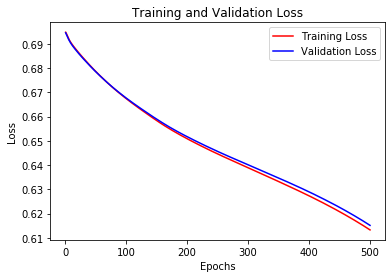

In [498]:
# Evaluate the losses of the model 
    epochs = range(1, len(loss)+1)
    plt.plot(epochs, loss, color='red', label='Training Loss')
    plt.plot(epochs, val_loss, color='blue', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


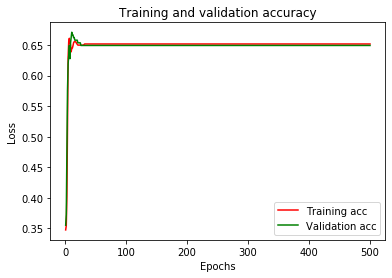

In [499]:
# Evaluate the accuracy of the model
    plt.plot(epochs, acc, color='red', label='Training acc')
    plt.plot(epochs, val_acc, color='green', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [500]:
y_pred_class_nn_mod5 = model.predict_classes(X_test_norm)
y_pred_prob_nn_mod5 = model.predict(X_test_norm)

accuracy is 0.649
roc-auc is 0.843


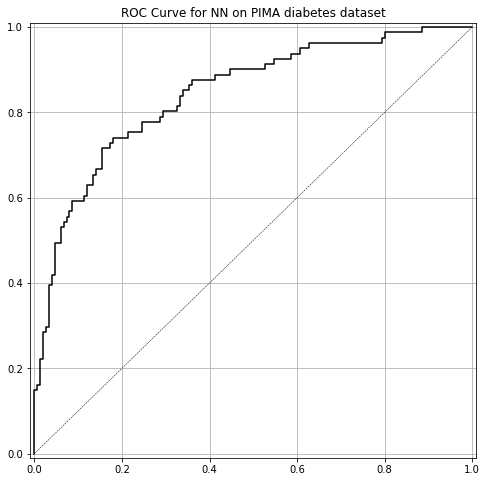

In [501]:
# Print model performance and plot the roc curve
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_mod5)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_mod5)))

plot_roc(y_test, y_pred_prob_nn_mod5, 'NN')

#### Accuracy obtained from this model is 64.9%

In [352]:
# Train the model for the given number of epochs
    history_700 = model.fit(
        X_train_norm, y_train,
        steps_per_epoch=10,
        epochs=700,
        verbose=1,
        validation_data=(X_test, y_test),
        validation_steps=10
    )

Train on 537 samples, validate on 231 samples
Epoch 1/700
10/10 [==============================] - 1s 58ms/step - loss: 0.5281 - acc: 0.7732 - val_loss: 0.5371 - val_acc: 0.7619
Epoch 2/700
10/10 [==============================] - 1s 56ms/step - loss: 0.5277 - acc: 0.7745 - val_loss: 0.5367 - val_acc: 0.7619
Epoch 3/700
10/10 [==============================] - 1s 53ms/step - loss: 0.5272 - acc: 0.7713 - val_loss: 0.5363 - val_acc: 0.7706
Epoch 4/700
10/10 [==============================] - 0s 48ms/step - loss: 0.5268 - acc: 0.7709 - val_loss: 0.5359 - val_acc: 0.7749
Epoch 5/700
10/10 [==============================] - 1s 56ms/step - loss: 0.5263 - acc: 0.7719 - val_loss: 0.5355 - val_acc: 0.7749
Epoch 6/700
10/10 [==============================] - 1s 52ms/step - loss: 0.5258 - acc: 0.7736 - val_loss: 0.5351 - val_acc: 0.7749
Epoch 7/700
10/10 [==============================] - 1s 52ms/step - loss: 0.5254 - acc: 0.7750 - val_loss: 0.5347 - val_acc: 0.7792
Epoch 8/700
10/10 [===========

10/10 [==============================] - 1s 53ms/step - loss: 0.5013 - acc: 0.7765 - val_loss: 0.5148 - val_acc: 0.7879
Epoch 63/700
10/10 [==============================] - 0s 47ms/step - loss: 0.5009 - acc: 0.7765 - val_loss: 0.5145 - val_acc: 0.7879
Epoch 64/700
10/10 [==============================] - 1s 51ms/step - loss: 0.5005 - acc: 0.7765 - val_loss: 0.5141 - val_acc: 0.7879
Epoch 65/700
10/10 [==============================] - 0s 49ms/step - loss: 0.5000 - acc: 0.7765 - val_loss: 0.5138 - val_acc: 0.7879
Epoch 66/700
10/10 [==============================] - 1s 50ms/step - loss: 0.4996 - acc: 0.7765 - val_loss: 0.5135 - val_acc: 0.7879
Epoch 67/700
10/10 [==============================] - 1s 57ms/step - loss: 0.4992 - acc: 0.7765 - val_loss: 0.5131 - val_acc: 0.7879
Epoch 68/700
10/10 [==============================] - 1s 52ms/step - loss: 0.4988 - acc: 0.7765 - val_loss: 0.5128 - val_acc: 0.7879
Epoch 69/700
10/10 [==============================] - 0s 49ms/step - loss: 0.4984 

10/10 [==============================] - 1s 52ms/step - loss: 0.4768 - acc: 0.7920 - val_loss: 0.4970 - val_acc: 0.7706
Epoch 124/700
10/10 [==============================] - 1s 65ms/step - loss: 0.4764 - acc: 0.7933 - val_loss: 0.4968 - val_acc: 0.7706
Epoch 125/700
10/10 [==============================] - 1s 58ms/step - loss: 0.4761 - acc: 0.7933 - val_loss: 0.4965 - val_acc: 0.7706
Epoch 126/700
10/10 [==============================] - 1s 62ms/step - loss: 0.4757 - acc: 0.7933 - val_loss: 0.4963 - val_acc: 0.7706
Epoch 127/700
10/10 [==============================] - 1s 60ms/step - loss: 0.4753 - acc: 0.7933 - val_loss: 0.4961 - val_acc: 0.7706
Epoch 128/700
10/10 [==============================] - 1s 58ms/step - loss: 0.4749 - acc: 0.7933 - val_loss: 0.4958 - val_acc: 0.7706
Epoch 129/700
10/10 [==============================] - 1s 58ms/step - loss: 0.4746 - acc: 0.7933 - val_loss: 0.4956 - val_acc: 0.7706
Epoch 130/700
10/10 [==============================] - 1s 61ms/step - loss: 

10/10 [==============================] - 1s 72ms/step - loss: 0.4553 - acc: 0.7970 - val_loss: 0.4848 - val_acc: 0.7749
Epoch 185/700
10/10 [==============================] - 1s 70ms/step - loss: 0.4550 - acc: 0.7970 - val_loss: 0.4847 - val_acc: 0.7749
Epoch 186/700
10/10 [==============================] - 1s 72ms/step - loss: 0.4546 - acc: 0.7970 - val_loss: 0.4845 - val_acc: 0.7749
Epoch 187/700
10/10 [==============================] - 0s 47ms/step - loss: 0.4543 - acc: 0.7970 - val_loss: 0.4844 - val_acc: 0.7749
Epoch 188/700
10/10 [==============================] - 1s 56ms/step - loss: 0.4540 - acc: 0.7970 - val_loss: 0.4842 - val_acc: 0.7749
Epoch 189/700
10/10 [==============================] - 0s 47ms/step - loss: 0.4537 - acc: 0.7970 - val_loss: 0.4841 - val_acc: 0.7749
Epoch 190/700
10/10 [==============================] - 0s 50ms/step - loss: 0.4533 - acc: 0.7970 - val_loss: 0.4840 - val_acc: 0.7749
Epoch 191/700
10/10 [==============================] - 0s 49ms/step - loss: 

10/10 [==============================] - 0s 49ms/step - loss: 0.4367 - acc: 0.8063 - val_loss: 0.4783 - val_acc: 0.7792
Epoch 246/700
10/10 [==============================] - 0s 48ms/step - loss: 0.4364 - acc: 0.8063 - val_loss: 0.4782 - val_acc: 0.7792
Epoch 247/700
10/10 [==============================] - 0s 48ms/step - loss: 0.4361 - acc: 0.8082 - val_loss: 0.4781 - val_acc: 0.7792
Epoch 248/700
10/10 [==============================] - 0s 46ms/step - loss: 0.4359 - acc: 0.8082 - val_loss: 0.4781 - val_acc: 0.7835
Epoch 249/700
10/10 [==============================] - 0s 47ms/step - loss: 0.4356 - acc: 0.8082 - val_loss: 0.4780 - val_acc: 0.7835
Epoch 250/700
10/10 [==============================] - 1s 59ms/step - loss: 0.4353 - acc: 0.8082 - val_loss: 0.4779 - val_acc: 0.7835
Epoch 251/700
10/10 [==============================] - 1s 54ms/step - loss: 0.4350 - acc: 0.8082 - val_loss: 0.4779 - val_acc: 0.7835
Epoch 252/700
10/10 [==============================] - 0s 46ms/step - loss: 

10/10 [==============================] - 1s 60ms/step - loss: 0.4203 - acc: 0.8138 - val_loss: 0.4758 - val_acc: 0.7662
Epoch 307/700
10/10 [==============================] - 1s 69ms/step - loss: 0.4201 - acc: 0.8138 - val_loss: 0.4758 - val_acc: 0.7662
Epoch 308/700
10/10 [==============================] - 1s 75ms/step - loss: 0.4198 - acc: 0.8138 - val_loss: 0.4758 - val_acc: 0.7662
Epoch 309/700
10/10 [==============================] - 1s 60ms/step - loss: 0.4195 - acc: 0.8140 - val_loss: 0.4758 - val_acc: 0.7662
Epoch 310/700
10/10 [==============================] - 1s 59ms/step - loss: 0.4193 - acc: 0.8156 - val_loss: 0.4758 - val_acc: 0.7662
Epoch 311/700
10/10 [==============================] - 1s 58ms/step - loss: 0.4190 - acc: 0.8156 - val_loss: 0.4758 - val_acc: 0.7662
Epoch 312/700
10/10 [==============================] - 1s 57ms/step - loss: 0.4188 - acc: 0.8156 - val_loss: 0.4758 - val_acc: 0.7619
Epoch 313/700
10/10 [==============================] - 1s 56ms/step - loss: 

10/10 [==============================] - 1s 55ms/step - loss: 0.4048 - acc: 0.8240 - val_loss: 0.4766 - val_acc: 0.7662
Epoch 368/700
10/10 [==============================] - 1s 62ms/step - loss: 0.4046 - acc: 0.8250 - val_loss: 0.4766 - val_acc: 0.7662
Epoch 369/700
10/10 [==============================] - 1s 59ms/step - loss: 0.4043 - acc: 0.8250 - val_loss: 0.4766 - val_acc: 0.7662
Epoch 370/700
10/10 [==============================] - 1s 59ms/step - loss: 0.4041 - acc: 0.8250 - val_loss: 0.4767 - val_acc: 0.7662
Epoch 371/700
10/10 [==============================] - 1s 63ms/step - loss: 0.4038 - acc: 0.8250 - val_loss: 0.4767 - val_acc: 0.7662
Epoch 372/700
10/10 [==============================] - 1s 61ms/step - loss: 0.4036 - acc: 0.8250 - val_loss: 0.4767 - val_acc: 0.7662
Epoch 373/700
10/10 [==============================] - 1s 59ms/step - loss: 0.4033 - acc: 0.8250 - val_loss: 0.4768 - val_acc: 0.7662
Epoch 374/700
10/10 [==============================] - 1s 58ms/step - loss: 

10/10 [==============================] - 1s 60ms/step - loss: 0.3895 - acc: 0.8436 - val_loss: 0.4794 - val_acc: 0.7706
Epoch 429/700
10/10 [==============================] - 1s 60ms/step - loss: 0.3893 - acc: 0.8436 - val_loss: 0.4795 - val_acc: 0.7706
Epoch 430/700
10/10 [==============================] - 1s 69ms/step - loss: 0.3890 - acc: 0.8454 - val_loss: 0.4796 - val_acc: 0.7706
Epoch 431/700
10/10 [==============================] - 1s 63ms/step - loss: 0.3888 - acc: 0.8454 - val_loss: 0.4796 - val_acc: 0.7706
Epoch 432/700
10/10 [==============================] - 1s 56ms/step - loss: 0.3885 - acc: 0.8454 - val_loss: 0.4797 - val_acc: 0.7706
Epoch 433/700
10/10 [==============================] - 1s 60ms/step - loss: 0.3883 - acc: 0.8454 - val_loss: 0.4798 - val_acc: 0.7706
Epoch 434/700
10/10 [==============================] - 1s 57ms/step - loss: 0.3880 - acc: 0.8454 - val_loss: 0.4799 - val_acc: 0.7706
Epoch 435/700
10/10 [==============================] - 1s 57ms/step - loss: 

10/10 [==============================] - 1s 58ms/step - loss: 0.3732 - acc: 0.8529 - val_loss: 0.4848 - val_acc: 0.7749
Epoch 490/700
10/10 [==============================] - 1s 62ms/step - loss: 0.3729 - acc: 0.8529 - val_loss: 0.4849 - val_acc: 0.7749
Epoch 491/700
10/10 [==============================] - 1s 58ms/step - loss: 0.3726 - acc: 0.8529 - val_loss: 0.4850 - val_acc: 0.7749
Epoch 492/700
10/10 [==============================] - 1s 56ms/step - loss: 0.3723 - acc: 0.8529 - val_loss: 0.4851 - val_acc: 0.7749
Epoch 493/700
10/10 [==============================] - 1s 56ms/step - loss: 0.3720 - acc: 0.8529 - val_loss: 0.4853 - val_acc: 0.7749
Epoch 494/700
10/10 [==============================] - 1s 57ms/step - loss: 0.3717 - acc: 0.8529 - val_loss: 0.4854 - val_acc: 0.7749
Epoch 495/700
10/10 [==============================] - 1s 60ms/step - loss: 0.3715 - acc: 0.8529 - val_loss: 0.4855 - val_acc: 0.7749
Epoch 496/700
10/10 [==============================] - 1s 60ms/step - loss: 

10/10 [==============================] - 1s 79ms/step - loss: 0.3558 - acc: 0.8646 - val_loss: 0.4935 - val_acc: 0.7749
Epoch 551/700
10/10 [==============================] - 1s 65ms/step - loss: 0.3555 - acc: 0.8641 - val_loss: 0.4937 - val_acc: 0.7749
Epoch 552/700
10/10 [==============================] - 1s 123ms/step - loss: 0.3552 - acc: 0.8641 - val_loss: 0.4938 - val_acc: 0.7749
Epoch 553/700
10/10 [==============================] - 1s 82ms/step - loss: 0.3549 - acc: 0.8641 - val_loss: 0.4940 - val_acc: 0.7749
Epoch 554/700
10/10 [==============================] - 1s 59ms/step - loss: 0.3547 - acc: 0.8641 - val_loss: 0.4941 - val_acc: 0.7749
Epoch 555/700
10/10 [==============================] - 1s 108ms/step - loss: 0.3544 - acc: 0.8641 - val_loss: 0.4943 - val_acc: 0.7749
Epoch 556/700
10/10 [==============================] - 1s 50ms/step - loss: 0.3541 - acc: 0.8624 - val_loss: 0.4944 - val_acc: 0.7749
Epoch 557/700
10/10 [==============================] - 1s 64ms/step - loss

10/10 [==============================] - 1s 61ms/step - loss: 0.3392 - acc: 0.8752 - val_loss: 0.5037 - val_acc: 0.7706
Epoch 612/700
10/10 [==============================] - 1s 55ms/step - loss: 0.3389 - acc: 0.8752 - val_loss: 0.5038 - val_acc: 0.7706
Epoch 613/700
10/10 [==============================] - 1s 56ms/step - loss: 0.3387 - acc: 0.8752 - val_loss: 0.5040 - val_acc: 0.7706
Epoch 614/700
10/10 [==============================] - 1s 56ms/step - loss: 0.3384 - acc: 0.8752 - val_loss: 0.5042 - val_acc: 0.7706
Epoch 615/700
10/10 [==============================] - 1s 68ms/step - loss: 0.3381 - acc: 0.8752 - val_loss: 0.5043 - val_acc: 0.7706
Epoch 616/700
10/10 [==============================] - 1s 57ms/step - loss: 0.3379 - acc: 0.8752 - val_loss: 0.5045 - val_acc: 0.7706
Epoch 617/700
10/10 [==============================] - 1s 57ms/step - loss: 0.3376 - acc: 0.8752 - val_loss: 0.5047 - val_acc: 0.7706
Epoch 618/700
10/10 [==============================] - 1s 61ms/step - loss: 

10/10 [==============================] - 1s 64ms/step - loss: 0.3231 - acc: 0.8808 - val_loss: 0.5136 - val_acc: 0.7662
Epoch 673/700
10/10 [==============================] - 1s 56ms/step - loss: 0.3229 - acc: 0.8808 - val_loss: 0.5138 - val_acc: 0.7662
Epoch 674/700
10/10 [==============================] - 1s 91ms/step - loss: 0.3226 - acc: 0.8808 - val_loss: 0.5140 - val_acc: 0.7662
Epoch 675/700
10/10 [==============================] - 1s 85ms/step - loss: 0.3223 - acc: 0.8808 - val_loss: 0.5141 - val_acc: 0.7662
Epoch 676/700
10/10 [==============================] - 1s 64ms/step - loss: 0.3221 - acc: 0.8808 - val_loss: 0.5143 - val_acc: 0.7662
Epoch 677/700
10/10 [==============================] - 1s 56ms/step - loss: 0.3218 - acc: 0.8808 - val_loss: 0.5145 - val_acc: 0.7662
Epoch 678/700
10/10 [==============================] - 1s 62ms/step - loss: 0.3215 - acc: 0.8808 - val_loss: 0.5147 - val_acc: 0.7662
Epoch 679/700
10/10 [==============================] - 1s 58ms/step - loss: 

In [353]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

In [354]:
y_pred_class_nn_mod6 = model.predict_classes(X_test_norm)
y_pred_prob_nn_mod6 = model.predict(X_test_norm)

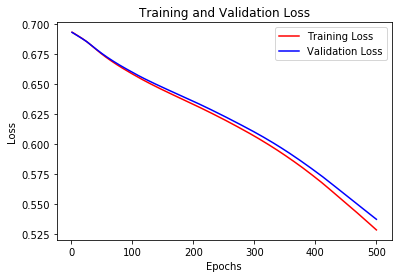

In [355]:
# Evaluate the losses of the model 
    epochs = range(1, len(loss)+1)
    plt.plot(epochs, loss, color='red', label='Training Loss')
    plt.plot(epochs, val_loss, color='blue', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

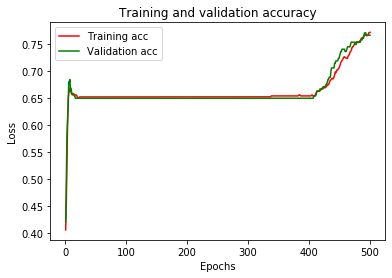

In [356]:
# Evaluate the accuracy of the model
    plt.plot(epochs, acc, color='red', label='Training acc')
    plt.plot(epochs, val_acc, color='green', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

accuracy is 0.766
roc-auc is 0.828


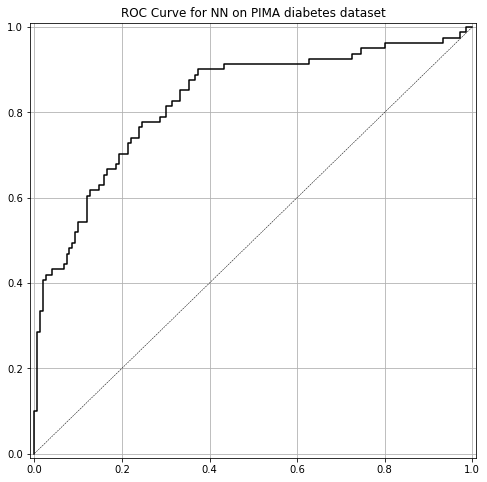

In [357]:
# Print model performance and plot the roc curve
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_mod6)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_mod6)))

plot_roc(y_test, y_pred_prob_nn_mod6, 'NN')

#### Accuracy obtained from this model is 76.6%

Now, lets modify the model to accomodate new learning rate and then check the performance. 

In [502]:
model_1 = Sequential()
model_1 = model_4(model_1)

In [503]:
# compile the model
    model_1.compile(
        loss = 'binary_crossentropy',
        optimizer = SGD(lr=0.05, decay=1e-6, momentum=0.9),
        metrics = ['accuracy']
    )

In [510]:
# Train the model for the given number of epochs
    history = model_1.fit(
        X_train_norm, y_train,
        steps_per_epoch=20,
        epochs=200,
        verbose=1,
        validation_data=(X_test, y_test),
        validation_steps=10
    )

Train on 537 samples, validate on 231 samples
Epoch 1/200
20/20 [==============================] - 1s 68ms/step - loss: 2.8621e-05 - acc: 1.0000 - val_loss: 2.6161 - val_acc: 0.7576
Epoch 2/200
20/20 [==============================] - 1s 67ms/step - loss: 2.7863e-05 - acc: 1.0000 - val_loss: 2.6232 - val_acc: 0.7576
Epoch 3/200
20/20 [==============================] - 1s 68ms/step - loss: 2.7142e-05 - acc: 1.0000 - val_loss: 2.6242 - val_acc: 0.7576
Epoch 4/200
20/20 [==============================] - 1s 71ms/step - loss: 2.6454e-05 - acc: 1.0000 - val_loss: 2.6281 - val_acc: 0.7576
Epoch 5/200
20/20 [==============================] - 1s 68ms/step - loss: 2.5800e-05 - acc: 1.0000 - val_loss: 2.6266 - val_acc: 0.7576
Epoch 6/200
20/20 [==============================] - 1s 71ms/step - loss: 2.5175e-05 - acc: 1.0000 - val_loss: 2.6323 - val_acc: 0.7576
Epoch 7/200
20/20 [==============================] - 1s 72ms/step - loss: 2.4578e-05 - acc: 1.0000 - val_loss: 2.6334 - val_acc: 0.7576
Ep

20/20 [==============================] - 1s 73ms/step - loss: 1.0437e-05 - acc: 1.0000 - val_loss: 2.7042 - val_acc: 0.7619
Epoch 61/200
20/20 [==============================] - 2s 77ms/step - loss: 1.0319e-05 - acc: 1.0000 - val_loss: 2.7035 - val_acc: 0.7619
Epoch 62/200
20/20 [==============================] - 1s 67ms/step - loss: 1.0202e-05 - acc: 1.0000 - val_loss: 2.7006 - val_acc: 0.7619
Epoch 63/200
20/20 [==============================] - 1s 70ms/step - loss: 1.0089e-05 - acc: 1.0000 - val_loss: 2.6998 - val_acc: 0.7619
Epoch 64/200
20/20 [==============================] - 1s 68ms/step - loss: 9.9777e-06 - acc: 1.0000 - val_loss: 2.6957 - val_acc: 0.7619
Epoch 65/200
20/20 [==============================] - 1s 67ms/step - loss: 9.8687e-06 - acc: 1.0000 - val_loss: 2.7049 - val_acc: 0.7619
Epoch 66/200
20/20 [==============================] - 1s 68ms/step - loss: 9.7624e-06 - acc: 1.0000 - val_loss: 2.7015 - val_acc: 0.7619
Epoch 67/200
20/20 [==============================] - 

20/20 [==============================] - 1s 68ms/step - loss: 6.1243e-06 - acc: 1.0000 - val_loss: 2.7371 - val_acc: 0.7619
Epoch 120/200
20/20 [==============================] - 1s 68ms/step - loss: 6.0800e-06 - acc: 1.0000 - val_loss: 2.7394 - val_acc: 0.7619
Epoch 121/200
20/20 [==============================] - 1s 65ms/step - loss: 6.0369e-06 - acc: 1.0000 - val_loss: 2.7329 - val_acc: 0.7619
Epoch 122/200
20/20 [==============================] - 1s 68ms/step - loss: 5.9940e-06 - acc: 1.0000 - val_loss: 2.7403 - val_acc: 0.7619
Epoch 123/200
20/20 [==============================] - 1s 67ms/step - loss: 5.9518e-06 - acc: 1.0000 - val_loss: 2.7383 - val_acc: 0.7619
Epoch 124/200
20/20 [==============================] - 1s 69ms/step - loss: 5.9101e-06 - acc: 1.0000 - val_loss: 2.7398 - val_acc: 0.7619
Epoch 125/200
20/20 [==============================] - 1s 70ms/step - loss: 5.8691e-06 - acc: 1.0000 - val_loss: 2.7374 - val_acc: 0.7619
Epoch 126/200
20/20 [===========================

Epoch 178/200
20/20 [==============================] - 1s 66ms/step - loss: 4.2636e-06 - acc: 1.0000 - val_loss: 2.7642 - val_acc: 0.7619
Epoch 179/200
20/20 [==============================] - 1s 74ms/step - loss: 4.2415e-06 - acc: 1.0000 - val_loss: 2.7657 - val_acc: 0.7619
Epoch 180/200
20/20 [==============================] - 2s 75ms/step - loss: 4.2195e-06 - acc: 1.0000 - val_loss: 2.7610 - val_acc: 0.7619
Epoch 181/200
20/20 [==============================] - 2s 81ms/step - loss: 4.1981e-06 - acc: 1.0000 - val_loss: 2.7656 - val_acc: 0.7619
Epoch 182/200
20/20 [==============================] - 1s 62ms/step - loss: 4.1763e-06 - acc: 1.0000 - val_loss: 2.7641 - val_acc: 0.7619
Epoch 183/200
20/20 [==============================] - 1s 48ms/step - loss: 4.1549e-06 - acc: 1.0000 - val_loss: 2.7666 - val_acc: 0.7619
Epoch 184/200
20/20 [==============================] - 1s 62ms/step - loss: 4.1335e-06 - acc: 1.0000 - val_loss: 2.7643 - val_acc: 0.7619
Epoch 185/200
20/20 [=============

In [511]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

In [512]:
y_pred_class_nn_mod7 = model_1.predict_classes(X_test_norm)
y_pred_prob_nn_mod7 = model_1.predict(X_test_norm)

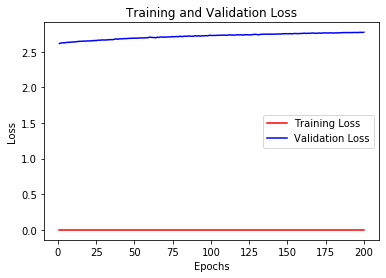

In [513]:
# Evaluate the losses of the model 
    epochs = range(1, len(loss)+1)
    plt.plot(epochs, loss, color='red', label='Training Loss')
    plt.plot(epochs, val_loss, color='blue', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

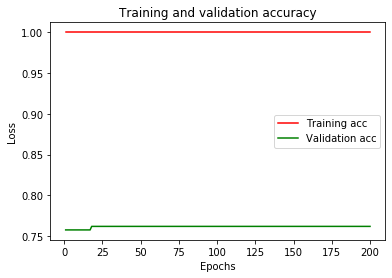

In [514]:
# Evaluate the accuracy of the model
    plt.plot(epochs, acc, color='red', label='Training acc')
    plt.plot(epochs, val_acc, color='green', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

accuracy is 0.762
roc-auc is 0.769


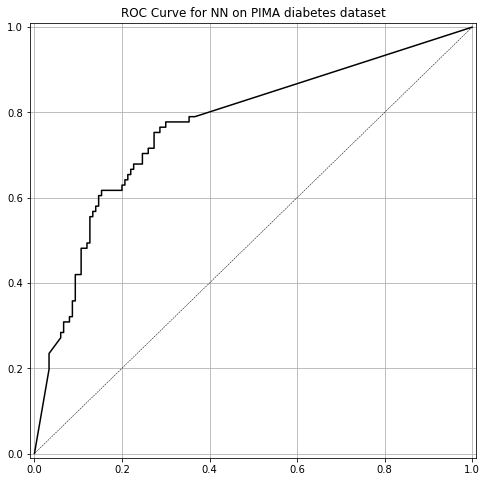

In [516]:
# Print model performance and plot the roc curve
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_mod7)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_mod7)))

plot_roc(y_test, y_pred_prob_nn_mod7, 'NN')

#### Accuracy obtained from this model is 76.2% and AUC-ROC value is 0.769

## Conclusion

We used various machine learning and deep learning techniques to predict the outcome and evaluated the model based on the accuracy score and ROC-AUC curve obtained. During the model building and evaluation, we have calculated and plotted training and validation accuracy curve as well as training and validation losses curves. 

Here are the results:

Random Forest Technique : Accuracy score : 72.3%   

K-Nearest Neighbors     : Accuracy score : 75.3%        

Gradient Boosting       : Accuracy score : 78.3%        

ANN Model 1             : Best Accuracy score: 77.5%    AUC-ROC : 0.814

ANN Model 2             : Best Accuracy score: 73.2%    AUC-ROC : 0.774

ANN Model 3             : Best Accuracy score: 76.2%    AUC-ROC : 0.769

If hyperparameters in deep learning are tuned more and regularization techniques are applied then model performance can be improved and this can give better accuracy then other machine learning models. 

We tried developing different models with different number of layers, learning rates and different activation functions.

### Contribution:

85% of the code has been developed by me and the rest of the code has been referred from other sources like research paper, blogs and github. 

### Citation: 

https://tensorflow-object-detection-api-tutorial.readthedocs.io/en/latest/install.html

https://towardsdatascience.com/understanding-learning-rates-and-how-it-improves-performance-in-deep-learning-d0d4059c1c10

https://www.geeksforgeeks.org/python-how-and-where-to-apply-feature-scaling/

https://medium.com/machine-learning-101/chapter-5-random-forest-classifier-56dc7425c3e1

https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761

https://www.jeremyjordan.me/nn-learning-rate/

https://keras.io/metrics/

https://towardsdatascience.com/activation-functions-and-its-types-which-is-better-a9a5310cc8f

https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/

https://keras.io/optimizers/

http://ruder.io/optimizing-gradient-descent/index.html#stochasticgradientdescent

https://towardsdatascience.com/understanding-learning-rates-and-how-it-improves-performance-in-deep-learning-d0d4059c1c10

https://www.kaggle.com/adhishthite/pima-dataset-prediction-model-with-keras-80

https://www.kaggle.com/uciml/pima-indians-diabetes-database

## License

Copyright 2019 Ashmita Nigam

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:
The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.